<h1>Simon, Searchlight, No Game: Between Participants, Equal Distributions, 4 Rounds</h1>

In [473]:
import os 
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

from util.survey_structure import FSS_SURVEY_STATEMENTS
from util.simon_exposures_counter import simon_exposures_counter, baseline_exposures_counter

In [474]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(font_scale=2)

In [475]:
# SEARCHLIGHT_DATA_PATH = "./data/10-participants-4-rounds/searchlight.db"
# NO_GAME_DATA_PATH = "./data/10-participants-4-rounds/no-game.db"
# SIMON_DATA_PATH = "./data/10-participants-4-rounds/simon.db"


SEARCHLIGHT_DATA_PATH = "./data/30-participants/searchlight.db"
NO_GAME_DATA_PATH = "./data/30-participants/no-game.db"
SIMON_DATA_PATH = "./data/30-participants/simon.db"

In [476]:
FOLDER_NAME = "30-participants-study-results"

In [477]:
# Note: this will all be reassigned to actual datasets below 
TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
PARTICIPANT = "participant"
PROGRESS = "progress"

In [478]:
FSS_SURVEY_ONE_NO_GAME = "questionnaire_questionnaire_fss_no_game_1"
FSS_SURVEY_TWO_NO_GAME = "questionnaire_questionnaire_fss_no_game_2"
FSS_SURVEY_THREE_NO_GAME = "questionnaire_questionnaire_fss_no_game_3"
FSS_SURVEY_FOUR_NO_GAME = "questionnaire_questionnaire_fss_no_game_4"
FSS_SURVEY_ONE_SIMON = "questionnaire_modified_fss_1"
FSS_SURVEY_TWO_SIMON = "questionnaire_modified_fss_2"
FSS_SURVEY_THREE_SIMON = "questionnaire_modified_fss_3"
FSS_SURVEY_FOUR_SIMON = "questionnaire_modified_fss_4"
FSS_SURVEY_ONE = "questionnaire_questionnaire_fss_1"
FSS_SURVEY_TWO= "questionnaire_questionnaire_fss_2"
FSS_SURVEY_THREE = "questionnaire_questionnaire_fss_3"
FSS_SURVEY_FOUR = "questionnaire_questionnaire_fss_4"

<h2>Read in No Game</h2>

In [479]:
no_game_connection = sqlite3.connect(NO_GAME_DATA_PATH)
cursor = no_game_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no_game_1',), ('questionnaire_questionnaire_fss_no_game_4',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_no_game_3',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no_game_2',), ('table_trialLog',), ('table_streamLog',)]


In [480]:
NO_GAME_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", no_game_connection)
NO_GAME_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", no_game_connection)
NO_GAME_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_NO_GAME}", no_game_connection)
NO_GAME_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_NO_GAME}", no_game_connection)
NO_GAME_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_NO_GAME}", no_game_connection)
NO_GAME_FSS_FOUR = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR_NO_GAME}", no_game_connection)
NO_GAME_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", no_game_connection)
NO_GAME_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", no_game_connection)
no_game_connection.close()

In [481]:
NO_GAME_FSS_ONE['breakpoint'] = 1
NO_GAME_FSS_TWO['breakpoint'] = 2
NO_GAME_FSS_THREE['breakpoint'] = 3
NO_GAME_FSS_FOUR['breakpoint'] = 4

NO_GAME_SURVEY = pd.concat([NO_GAME_FSS_ONE, NO_GAME_FSS_TWO, NO_GAME_FSS_THREE, NO_GAME_FSS_FOUR], ignore_index=True)

<h2>Read in Searchlight Data</h2>

In [482]:
searchlight_connection = sqlite3.connect(SEARCHLIGHT_DATA_PATH)
cursor = searchlight_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_questionnaire_fss_no-game_3',), ('questionnaire_questionnaire_fss_4',), ('questionnaire_prolific_start',), ('questionnaire_questionnaire_fss_2',), ('questionnaire_questionnaire_fss_1',), ('questionnaire_questionnaire_fss_no-game_1',), ('questionnaire_demographics',), ('questionnaire_questionnaire_fss_3',), ('questionnaire_questionnaire_fss_no-game_2',), ('table_trialLog',), ('table_streamLog',)]


In [483]:
SEARCHLIGHT_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", searchlight_connection)
SEARCHLIGHT_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", searchlight_connection)
SEARCHLIGHT_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE}", searchlight_connection)
SEARCHLIGHT_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO}", searchlight_connection)
SEARCHLIGHT_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE}", searchlight_connection)
SEARCHLIGHT_FSS_FOUR= pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR}", searchlight_connection)
SEARCHLIGHT_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", searchlight_connection)
SEARCHLIGHT_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", searchlight_connection)
searchlight_connection.close()

In [484]:
SEARCHLIGHT_FSS_ONE['breakpoint'] = 1
SEARCHLIGHT_FSS_TWO['breakpoint'] = 2
SEARCHLIGHT_FSS_THREE['breakpoint'] = 3
SEARCHLIGHT_FSS_FOUR['breakpoint'] = 4

SEARCHLIGHT_SURVEY = pd.concat([SEARCHLIGHT_FSS_ONE, SEARCHLIGHT_FSS_TWO, SEARCHLIGHT_FSS_THREE, SEARCHLIGHT_FSS_FOUR], ignore_index=True)

<h2>Read in Simon data</h2>

In [485]:
simon_connection = sqlite3.connect(SIMON_DATA_PATH)
cursor = simon_connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_end_questionnaire',), ('questionnaire_modified_fss_2',), ('questionnaire_preferences',), ('questionnaire_prolific_start',), ('questionnaire_modified_fss_4',), ('questionnaire_modified_fss_1',), ('questionnaire_demographics',), ('questionnaire_modified_fss_3',), ('table_trialLog',), ('table_streamLog',)]


In [486]:
SIMON_TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", simon_connection)
SIMON_DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", simon_connection)
SIMON_FSS_ONE = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_ONE_SIMON}", simon_connection)
SIMON_FSS_TWO = pd.read_sql_query(f"SELECT * FROM {FSS_SURVEY_TWO_SIMON}", simon_connection)
SIMON_FSS_THREE = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_THREE_SIMON}", simon_connection)
SIMON_FSS_FOUR = pd.read_sql_query(f"SELECT  * FROM {FSS_SURVEY_FOUR_SIMON}", simon_connection)
SIMON_PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", simon_connection)
SIMON_PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", simon_connection)       
simon_connection.close()

In [487]:
SIMON_FSS_ONE['breakpoint'] = 1
SIMON_FSS_TWO['breakpoint'] = 2
SIMON_FSS_THREE['breakpoint'] = 3   
SIMON_FSS_FOUR['breakpoint'] = 4

SIMON_SURVEY = pd.concat([SIMON_FSS_ONE, SIMON_FSS_TWO, SIMON_FSS_THREE, SIMON_FSS_FOUR], ignore_index=True )

<h2>Data Setup</h2>



In [488]:
NO_GAME_TRIAL_DATA['treatment'] = 'no-game'
SIMON_TRIAL_DATA['treatment'] = 'simon'
SEARCHLIGHT_TRIAL_DATA['treatment'] = 'searchlight'

In [489]:
# NO_GAME_IDS_TO_REMOVE = [1, 2, 3, 4, 6]
# SEARCHLIGHT_IDS_TO_REMOVE = [6, 12, 13, 14, 15]
# SIMON_IDS_TO_REMOVE = [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 18, 19, 20, 21]


NO_GAME_IDS_TO_REMOVE = [1, 2, 3, 7, 10, 11, 17, 24]
SEARCHLIGHT_IDS_TO_REMOVE = [1, 7, 31, 34, 35, 36]
SIMON_IDS_TO_REMOVE = [1, 18, 22]


In [490]:

SEARCHLIGHT_TRIAL_DATA = SEARCHLIGHT_TRIAL_DATA[~SEARCHLIGHT_TRIAL_DATA["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_DEMOGRAPHICS = SEARCHLIGHT_DEMOGRAPHICS[~SEARCHLIGHT_DEMOGRAPHICS["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_PARTICIPANT = SEARCHLIGHT_PARTICIPANT[~SEARCHLIGHT_PARTICIPANT["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]
SEARCHLIGHT_SURVEY = SEARCHLIGHT_SURVEY[~SEARCHLIGHT_SURVEY["participantID"].isin(SEARCHLIGHT_IDS_TO_REMOVE)]

NO_GAME_TRIAL_DATA = NO_GAME_TRIAL_DATA[~NO_GAME_TRIAL_DATA["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_DEMOGRAPHICS = NO_GAME_DEMOGRAPHICS[~NO_GAME_DEMOGRAPHICS["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_PARTICIPANT = NO_GAME_PARTICIPANT[~NO_GAME_PARTICIPANT["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]
NO_GAME_SURVEY = NO_GAME_SURVEY[~NO_GAME_SURVEY["participantID"].isin(NO_GAME_IDS_TO_REMOVE)]

SIMON_TRIAL_DATA = SIMON_TRIAL_DATA[~SIMON_TRIAL_DATA["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_DEMOGRAPHICS = SIMON_DEMOGRAPHICS[~SIMON_DEMOGRAPHICS["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_PARTICIPANT = SIMON_PARTICIPANT[~SIMON_PARTICIPANT["participantID"].isin(SIMON_IDS_TO_REMOVE)]
SIMON_SURVEY = SIMON_SURVEY[~SIMON_SURVEY["participantID"].isin(SIMON_IDS_TO_REMOVE)]

<h2>Flow State and Motivational Survey</h2>

In [491]:
# Note Side Effects: This function will alter the original dataframe (shallow copy)
def format_likert_data_for_histogram(df: pd.DataFrame, likert_columns: list) -> pd.DataFrame:
    for column_name in likert_columns:
        df[column_name] = df[column_name].replace('1 (Strongly Disagree)', '1')
        df[column_name] = df[column_name].replace('7 (Strongly Agree)', '7')
        df[column_name] = df[column_name].replace('4 (Neutral)', '4')
        df[column_name] = df[column_name].astype('int64')
    return df

In [492]:
SEARCHLIGHT_SURVEY['condition'] = 'Searchlight'
NO_GAME_SURVEY['condition'] = 'Baseline'
SIMON_SURVEY['condition'] = 'Simon'
SURVEY = pd.concat([SEARCHLIGHT_SURVEY, NO_GAME_SURVEY, SIMON_SURVEY], ignore_index=True)
SURVEY.fillna(0, inplace=True)
SURVEY = format_likert_data_for_histogram(SURVEY, FSS_SURVEY_STATEMENTS)


if not os.path.exists(f"./plots/{FOLDER_NAME}/survey_overall/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/survey_overall/")



for block in SURVEY['breakpoint'].unique():
    for likert_data in FSS_SURVEY_STATEMENTS:
        plt.figure()
        sns.histplot(data=SURVEY[SURVEY['breakpoint']==block], multiple='dodge', hue='condition', x=likert_data, binrange=(1, 7), discrete=True).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Likert Scale Response", ylabel="Count")
        plt.savefig(f"./plots/{FOLDER_NAME}/survey_overall/{likert_data}_block_{block}.png")
        plt.close()

In [493]:
SURVEY.to_csv("./data/for-analysis/survey.csv")

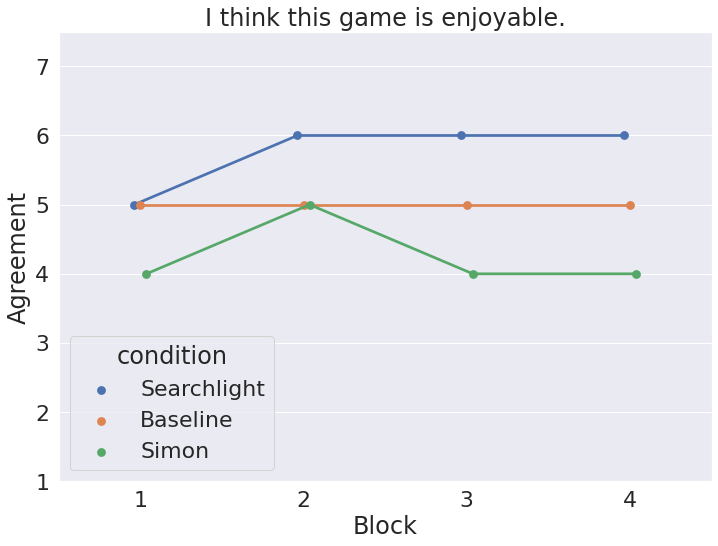

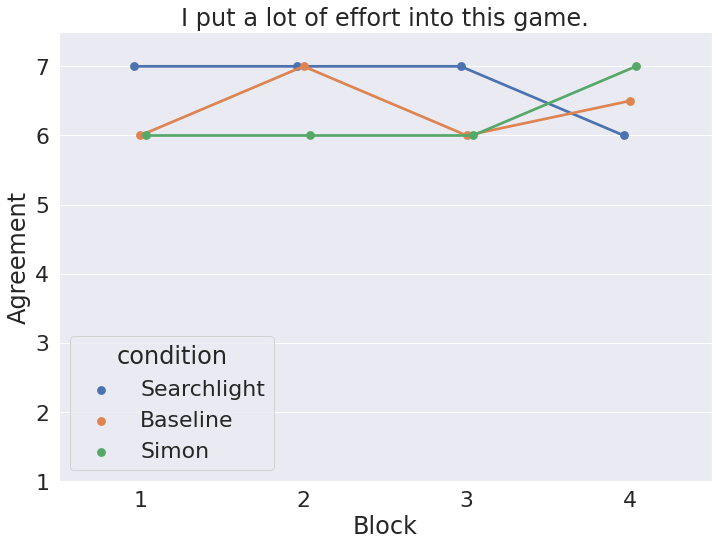

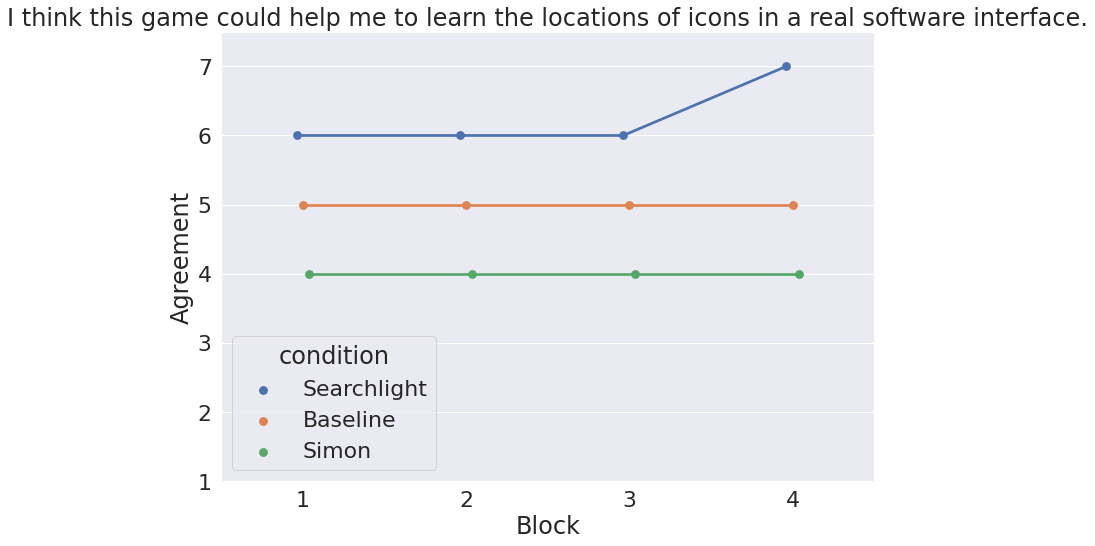

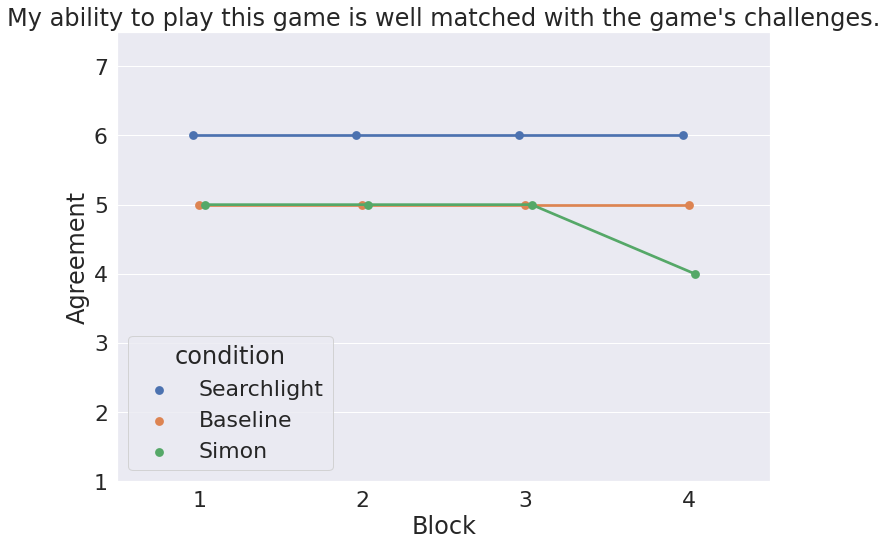

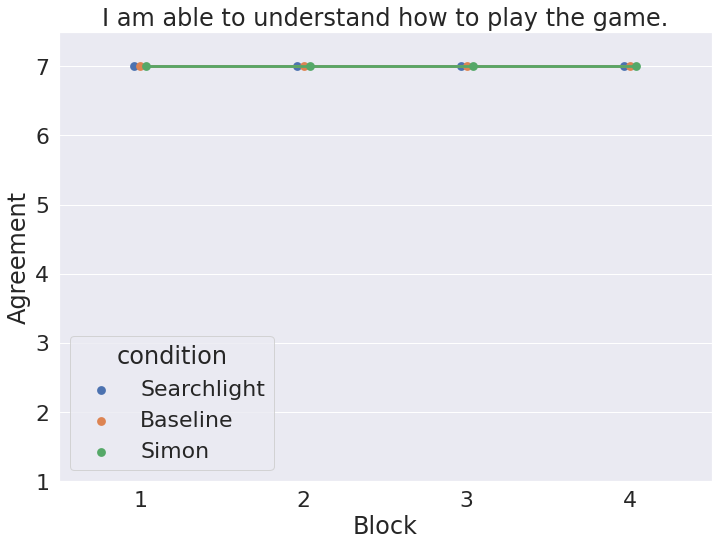

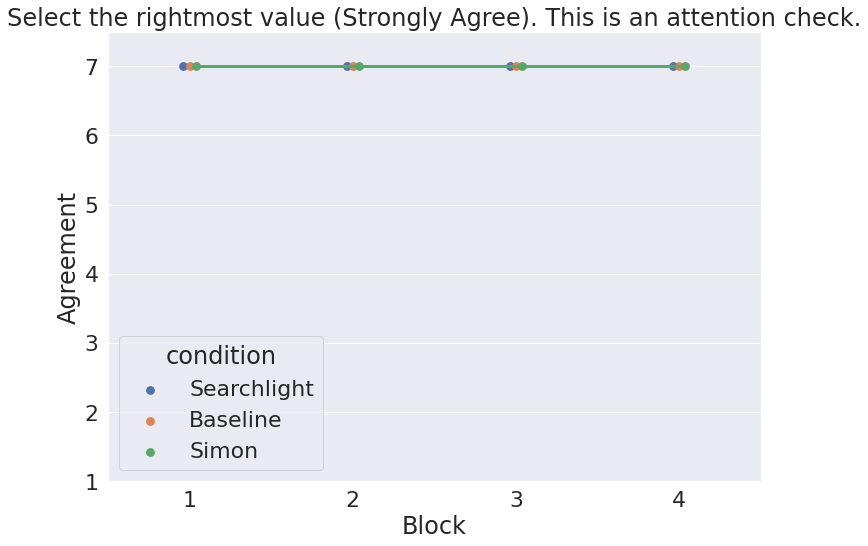

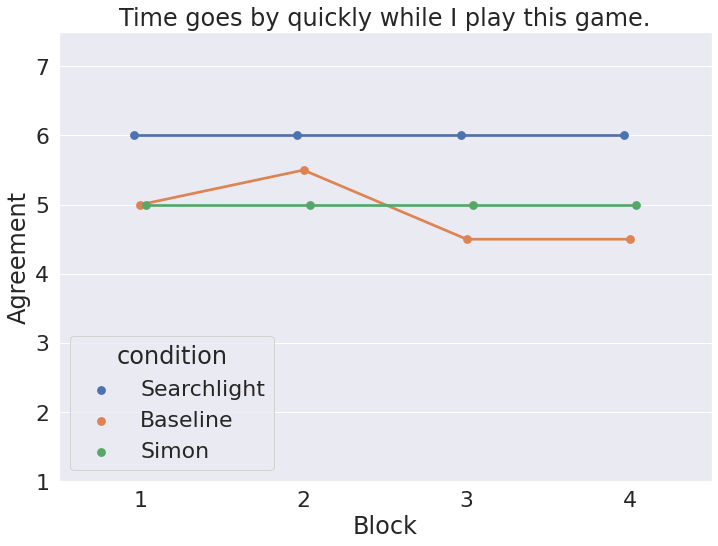

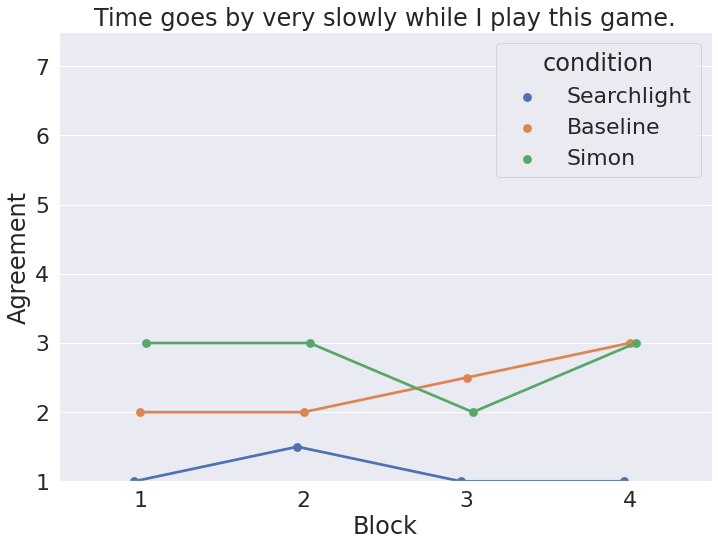

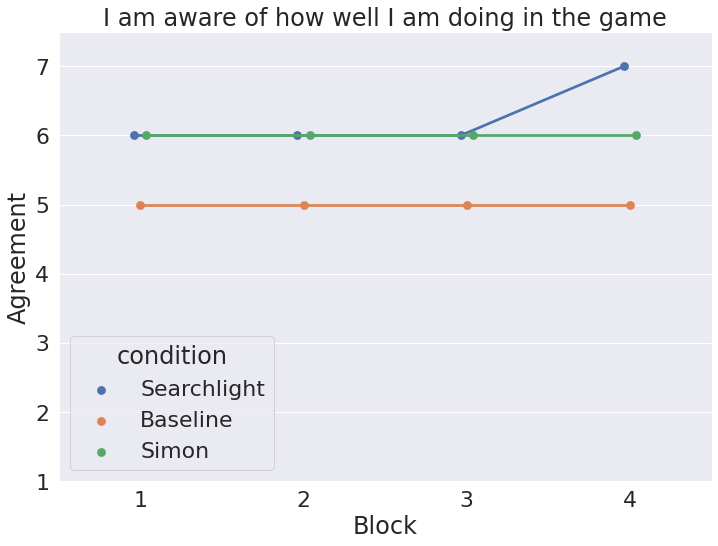

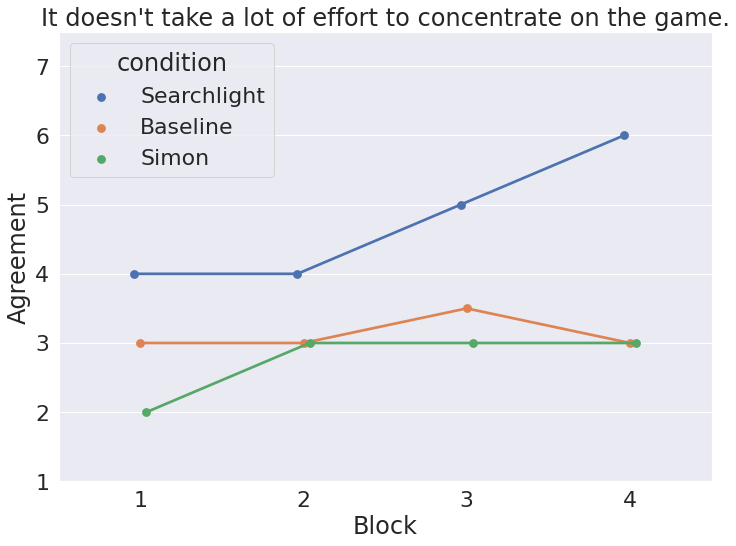

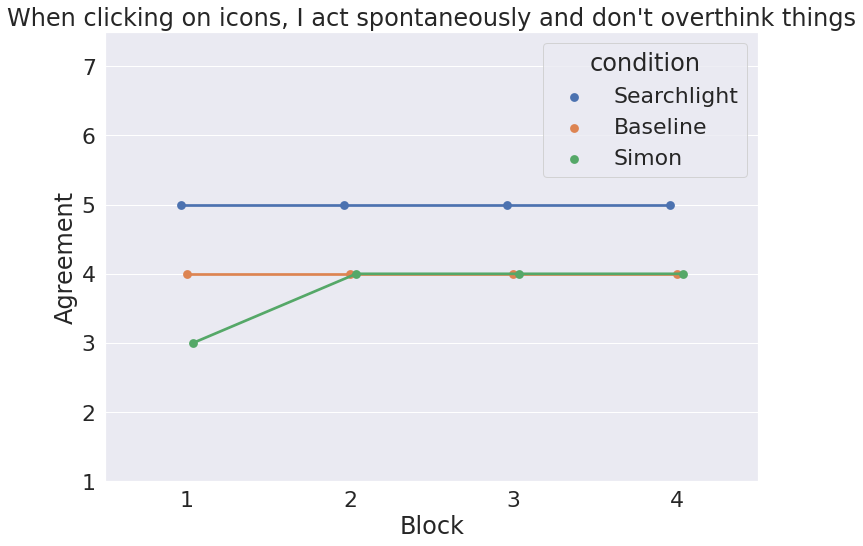

In [494]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/")

for likert_data in FSS_SURVEY_STATEMENTS:
    plt.figure()
    plt.ylim(1, 7.5)
    sns.pointplot(data=SURVEY, x='breakpoint', y=likert_data, hue='condition', dodge=True, ci=0, estimator=np.median).set(title=FSS_SURVEY_STATEMENTS[likert_data], xlabel="Block", ylabel="Agreement")
    plt.savefig(f"./plots/{FOLDER_NAME}/all_surveys_pointplots/{likert_data}.png")

<h2>Trial Data</h2>

In [495]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/trial_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/trial_data/")

In [496]:
simon_trial_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'training']
simon_trial_data = simon_trial_data_filtered.sort_values(['participantID', 'timeSubmitted'])
# simon_trial_data['trial_order'] = simon_trial_data.groupby('participantID').cumcount() + 1
simon_trial_data['trial_was_repeated'] = simon_trial_data['errors'].apply(lambda x: 0 if x <3 else 1)
simon_trial_data['repeat_count'] = simon_trial_data.groupby(['participantID', 'gameDistributionIndex', 'targetID'])['trial_was_repeated'].transform('sum')
simon_trial_data['trial_order'] = simon_trial_data_filtered['gameDistributionIndex'] + 1

In [497]:
searchlight_trial_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'training']
searchlight_successful_trials = searchlight_trial_data_filtered
#searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['manhattan']==0]
#searchlight_successful_trials = searchlight_trial_data_filtered[searchlight_trial_data_filtered['errors']==0]
searchlight_successful_trials = searchlight_successful_trials.sort_values(['participantID', 'timeSubmitted'])
searchlight_successful_trials['trial_order'] = searchlight_successful_trials.groupby('participantID').cumcount() + 1
searchlight_successful_trials['block_order'] = searchlight_successful_trials['trial_order'].apply(lambda x: (x - 1) // 18 + 1)
searchlight_successful_trials['trial_was_repeated'] = searchlight_successful_trials['errors'].apply(lambda x: 0 if x <5 else 1)
searchlight_successful_trials['repeat_count'] = searchlight_successful_trials.groupby(['participantID', 'block', 'targetID'])['trial_was_repeated'].transform('sum')
searchlight_successful_trials['condition'] = "Searchlight"

no_game_trial_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'training']
no_game_successful_trials = no_game_trial_data_filtered 
#no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['manhattan']==0]
#no_game_successful_trials = no_game_trial_data_filtered[no_game_trial_data_filtered['errors']==0]
no_game_successful_trials = no_game_successful_trials.sort_values(['participantID', 'timeSubmitted'])
no_game_successful_trials['trial_order'] = no_game_successful_trials.groupby('participantID').cumcount() + 1
no_game_successful_trials['block_order'] = no_game_successful_trials['trial_order'].apply(lambda x: (x - 1) // 18 + 1)
no_game_successful_trials['trial_was_repeated'] = no_game_successful_trials['errors'].apply(lambda x: 0 if x <5 else 1)
no_game_successful_trials['repeat_count'] = no_game_successful_trials.groupby(['participantID', 'block', 'targetID'])['trial_was_repeated'].transform('sum')

no_game_successful_trials['condition'] = "Baseline"

In [498]:
import json
trials_time_per_target = []

def get_target_id_from_simon_sequence(row):
    if row['treatment'] == 'simon':
        if int(row['errorInTrial']) == 0:
            sequence_list = row['sequence'].split(',')
            ct_list = row['ctForTargetInOrder'].split(',')
            # FIXME: move to function, also this was a terrible way to save the errors! 
            error_array = []
            if row['targetErrorArray'] is not None and row['targetErrorArray'] != '-1':
                try:
                    error_array_str = row['targetErrorArray'].split('},{')
                    for i, item in enumerate(error_array_str):
                        if i == 0:
                            item = item + '}'
                        elif i == len(error_array_str) - 1:
                            item = '{' + item
                        else:
                            item = '{' + item + '}'
                        error_array.append(json.loads(item))
                except:
                    pass
            for i in range(0, len(sequence_list)):
                # if error_array[i]["correct"] ==1 and error_array[i]["num_errors"] ==0:
                #if error_array[i]["num_errors"] ==0:
                    trials_time_per_target.append({
                        'condition': 'Simon',
                        'targetID': int(sequence_list[i]),
                        'ct': float(ct_list[i]),
                        'trial': int(row['trial']),  
                        'block': int(row['gameDistributionIndex'] + 1),
                        'trial_order': int(row['trial_order']),
                        'participantID': int(row['participantID']), 
                        'timeSubmitted': row['timeSubmitted'],
                        'locationInSequence': (i + 1),
                        'distanceFromEndOfSequence': int(len(sequence_list) - (i+1)),
                        'sequence' : row['sequence'],
                        'exposure_count': simon_exposures_counter(len(sequence_list), sequence_list[i], int(row['gameDistributionIndex']))
                    })
    else:
            trials_time_per_target.append({
                'condition': row['condition'],
                'targetID': row['targetID'],
                'ct': row['ct'],
                'block': int(row['block_order']), 
                'timeSubmitted': row['timeSubmitted'],
                'exposure_count':  baseline_exposures_counter(int(row['block']), int(row['trial']), str(row['targetID']))
            })
    return row

In [499]:
trial_data = pd.concat([searchlight_successful_trials, no_game_successful_trials], ignore_index=True)
simon_trial_data['condition'] = 'Simon'
trial_data = trial_data.append(simon_trial_data, ignore_index=True)

trial_data.apply(lambda row: get_target_id_from_simon_sequence(row), axis=1)

targets_time_per_click = pd.DataFrame(trials_time_per_target)    

# targets_time_per_click = targets_time_per_click[~((targets_time_per_click['condition'] == 'simon') & (targets_time_per_click['exposure_count'] > 15))]


/tmp/ipykernel_138702/853057378.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial_data = trial_data.append(simon_trial_data, ignore_index=True)


MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..
MYSTERY CALL..


In [500]:
trial_data.to_csv("./data/for-analysis/trial_data.csv")

In [501]:
trial_data['breakpoint'] = trial_data.apply(lambda x: x['block'] if x['condition'] != 'Simon' else x['gameDistributionIndex']+1, axis=1)

In [502]:
# Process data for each condition and breakpoint
conditions = trial_data['condition'].unique()
breakpoints = trial_data['breakpoint'].unique()

for condition in conditions:
    for breakpoint in breakpoints:
        # Filter data for current condition and breakpoint
        mask = (trial_data['condition'] == condition) & (trial_data['breakpoint'] == breakpoint)
        subset = trial_data[mask]
        
        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        trial_data = trial_data.drop(subset[outlier_mask].index)

/tmp/ipykernel_138702/1145648460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data['block'] = condition_data['gameDistributionIndex']+1


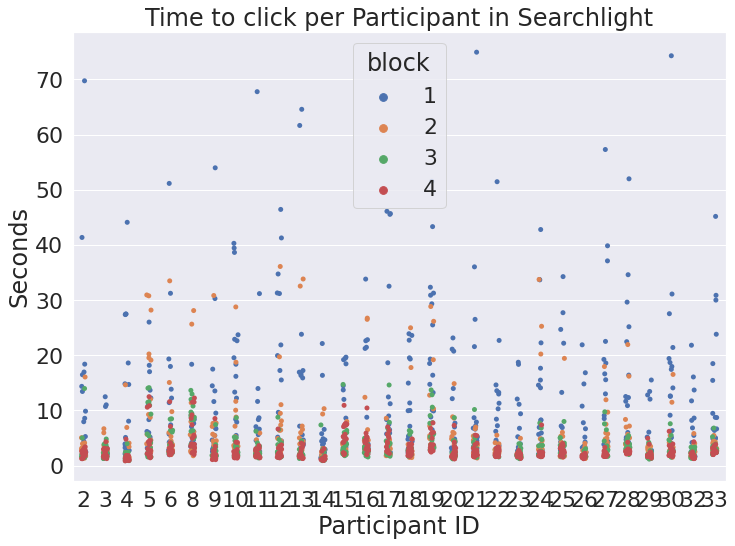

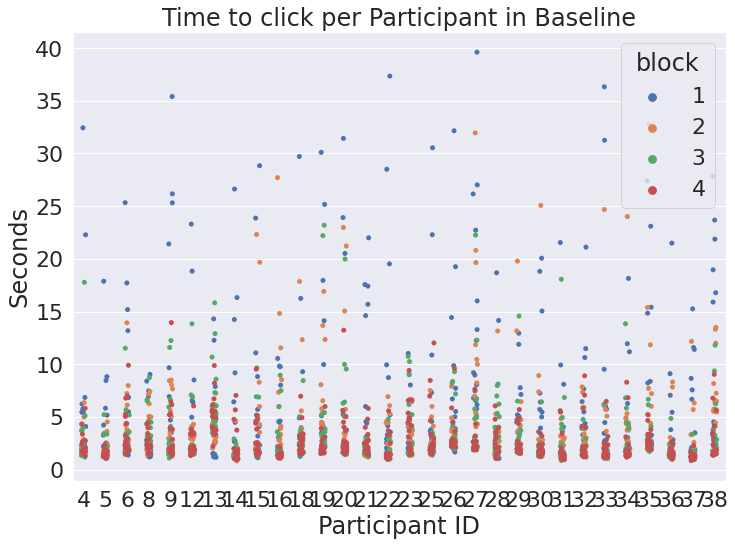

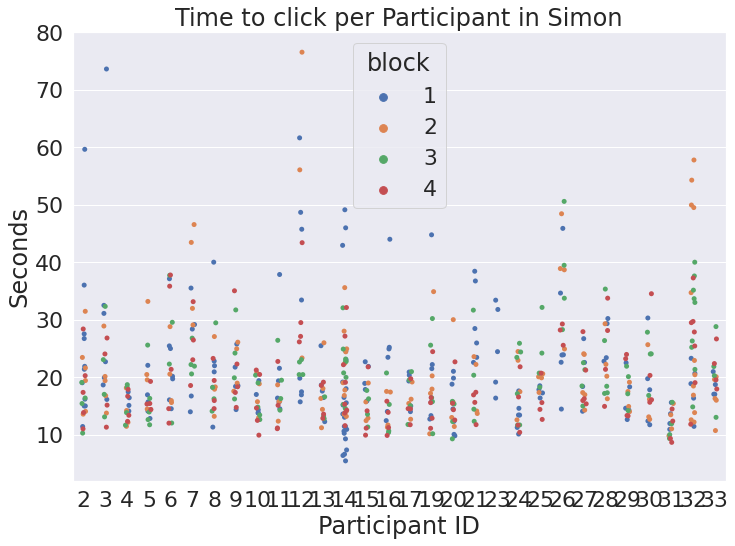

In [503]:
conditions = trial_data['condition'].unique()
trial_data['participantID'] = trial_data['participantID'].astype('str')

for condition in conditions:
    condition_data = trial_data[trial_data['condition']==condition]
    if condition == 'Simon':
        condition_data['block'] = condition_data['gameDistributionIndex']+1
    plt.figure()
    sns.stripplot(data=condition_data, x="participantID", y="ct", hue='block', jitter=True).set(title=f"Time to click per Participant in {condition}", xlabel="Participant ID", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/participant_time_to_click_pointplot_{condition}.png")


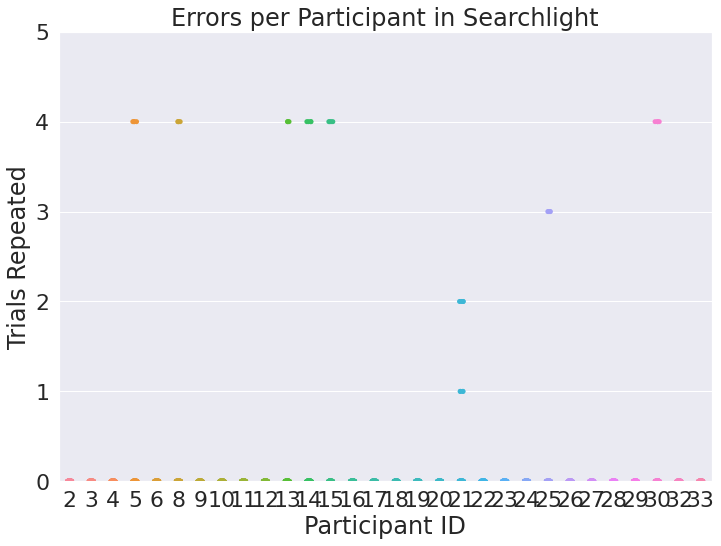

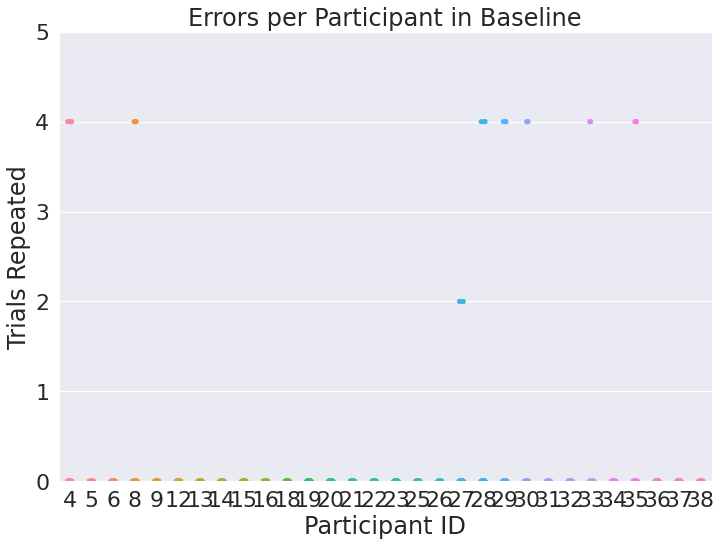

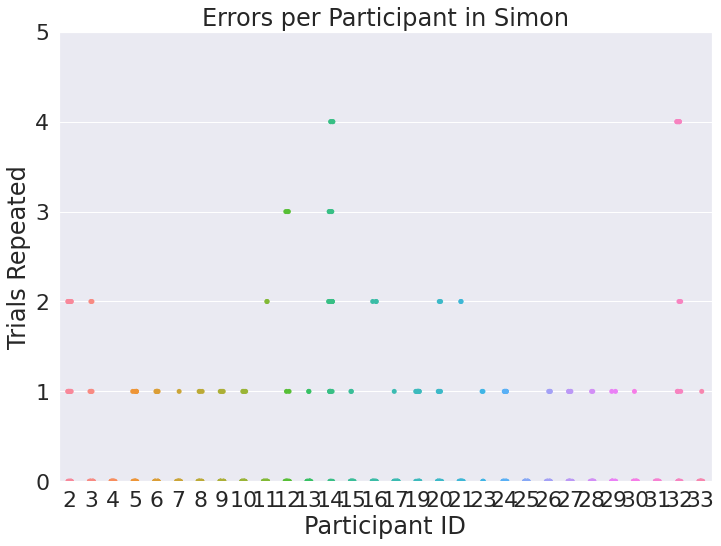

In [504]:
for condition in conditions:
    condition_data = trial_data[trial_data['condition']==condition]
    plt.figure()
    plt.ylim(0, 5)
    sns.stripplot(data=condition_data, x="participantID", y="repeat_count", jitter=True).set(title=f"Errors per Participant in {condition}", xlabel="Participant ID", ylabel="Trials Repeated")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/participant_errors_pointplot_{condition}.png")

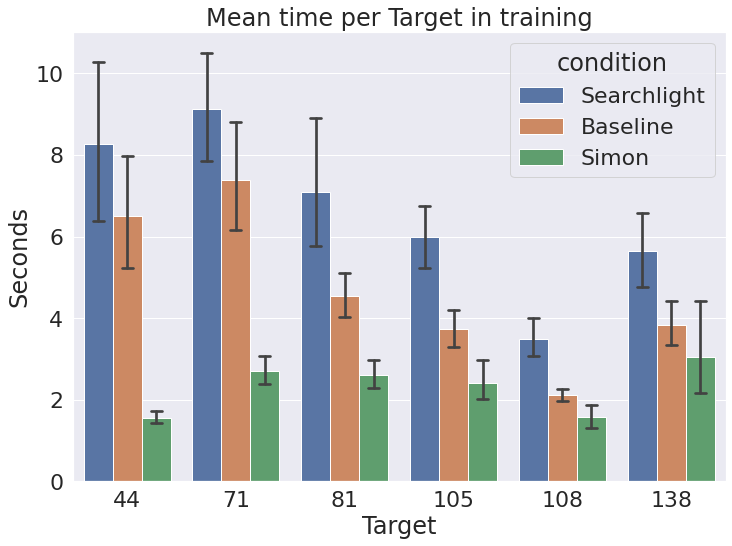

In [505]:
plt.figure()
# sns.pointplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95)).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
sns.barplot(data=targets_time_per_click, x='targetID', hue='condition', y=f'ct', dodge=True, ci=95, capsize=0.1).set(title="Mean time per Target in training", xlabel="Target", ylabel="Seconds")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target.png")

In [506]:
targets = targets_time_per_click['targetID'].unique()

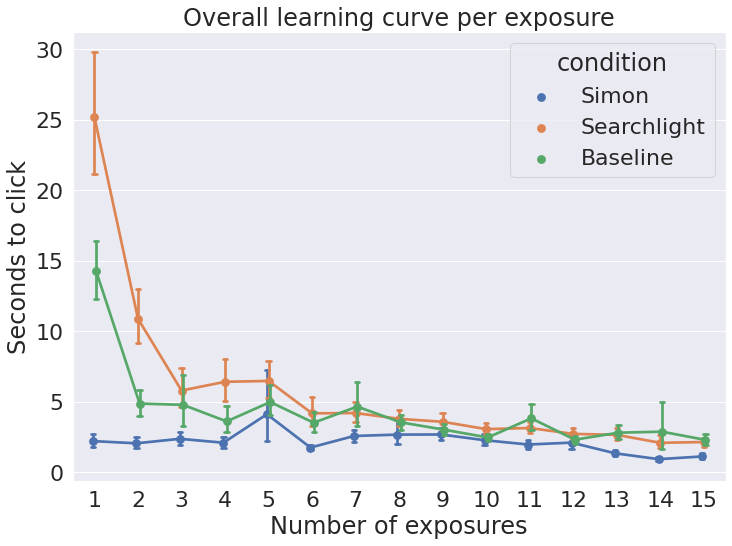

In [507]:

learning_curve = targets_time_per_click.sort_values(['participantID', 'timeSubmitted'])
# learning_curve['target_order'] = learning_curve.apply(lambda row: int(row['exposure_count']) if row['condition']=='Simon' else int(row['block']), axis=1)
# FIXME: this needs to be figured out better
# learning_curve = learning_curve[learning_curve['target_order'] <=12]
plt.figure()
sns.pointplot(data=learning_curve, x='exposure_count', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"Overall learning curve per exposure", xlabel="Number of exposures", ylabel="Seconds to click")
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/learning_curve_all_targets.png")

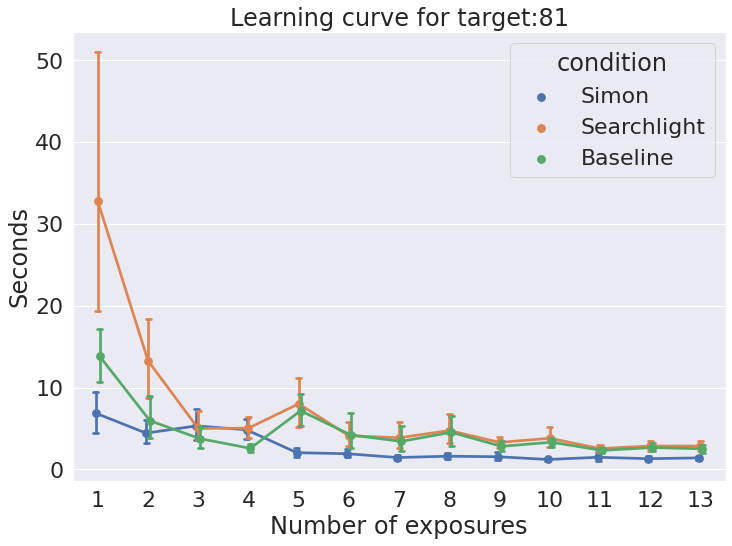

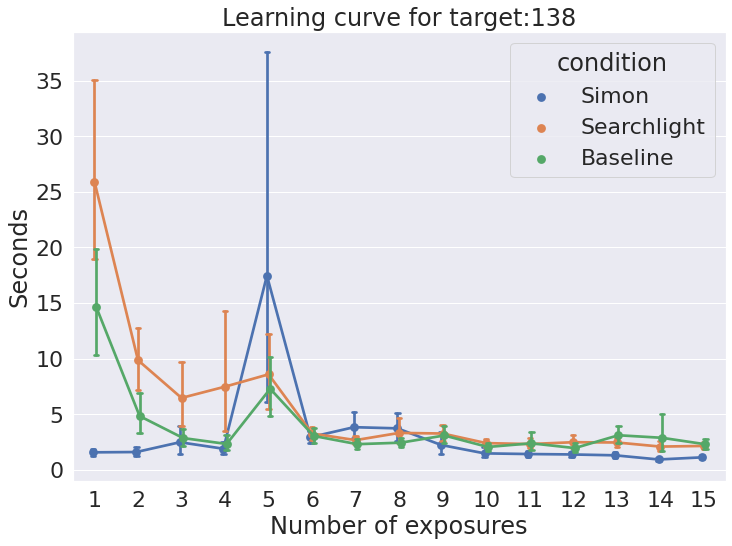

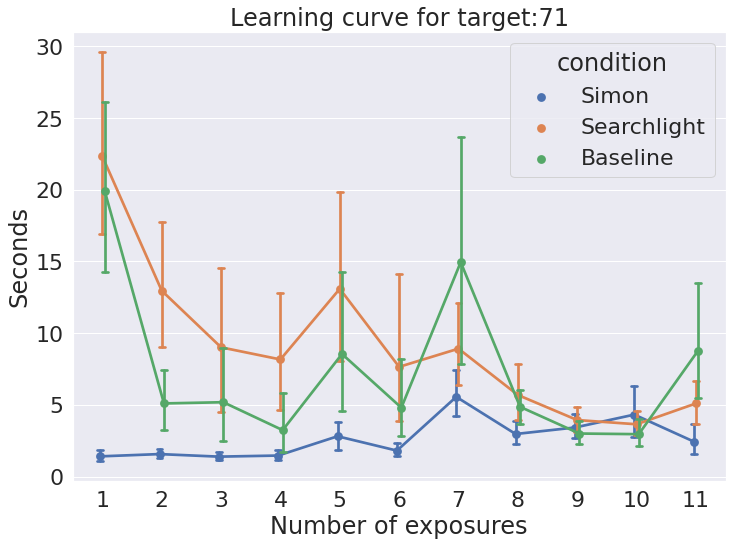

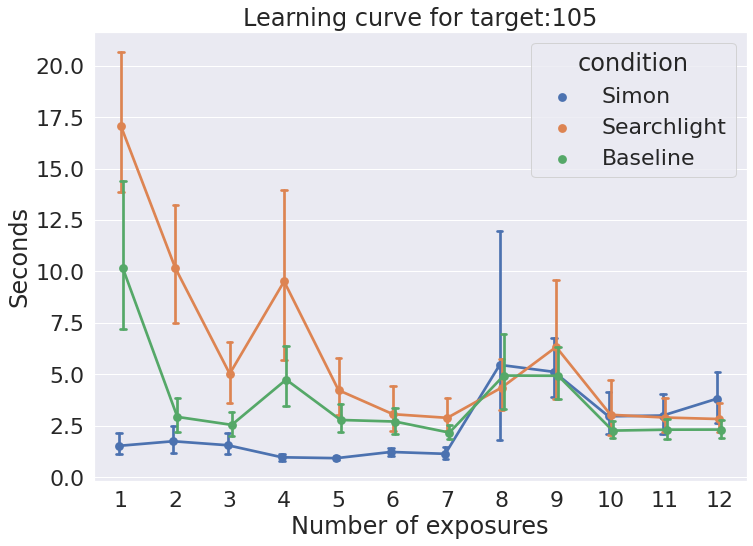

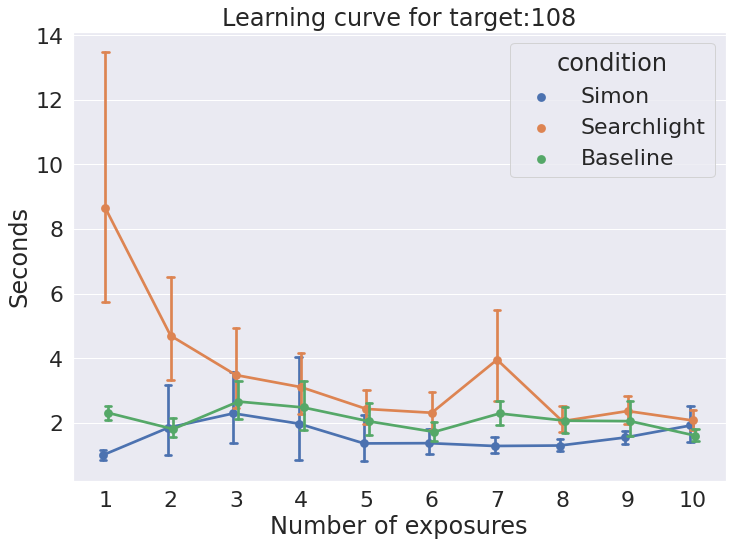

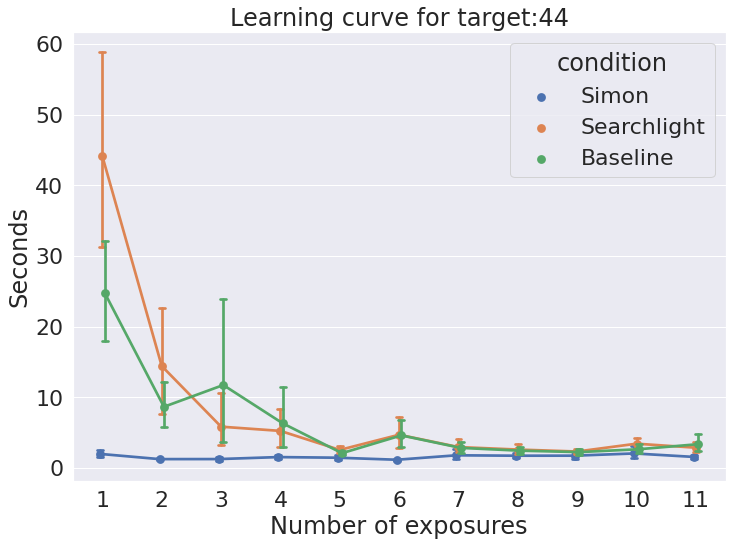

In [508]:


targets_time_per_click.to_csv(f"./data/for-analysis/targets_time_per_click.csv")

for target in targets:
    target_data = targets_time_per_click[targets_time_per_click['targetID'] == target]
    target_data_ordered = target_data.sort_values(['participantID', 'timeSubmitted'])
    # target_data_ordered['target_order'] = target_data_ordered.apply(lambda row: int(row['exposure_count']) if row['condition']=='Simon' else int(row['block']), axis=1)
    plt.figure()
    sns.pointplot(data=target_data_ordered, x='exposure_count', hue='condition', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"Learning curve for target:{target}", xlabel="Number of exposures", ylabel="Seconds")
    plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/mean_time_per_target_{str(target)}.png")

<h2>Time to click based on placement in sequence</h2>

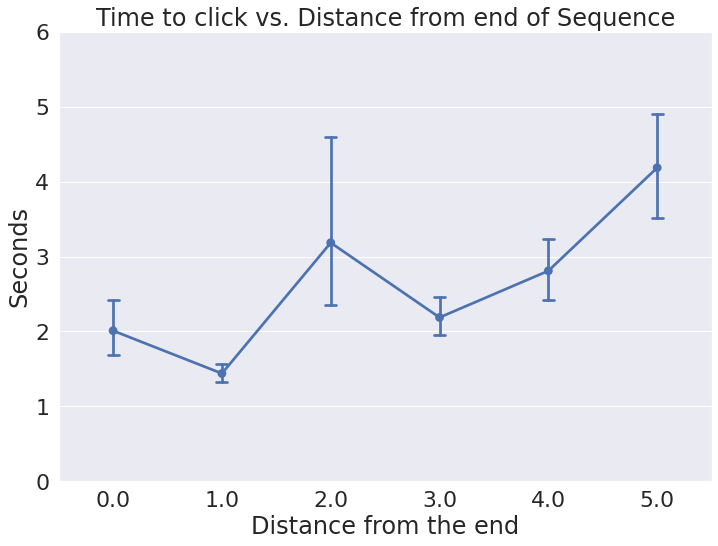

In [509]:
targets_time_per_click.dropna(inplace=True)


targets_time_per_click['trial_order'] = targets_time_per_click['trial_order'].astype(int)

plt.figure()
sns.pointplot(data=targets_time_per_click, x='distanceFromEndOfSequence', y=f'ct', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"Time to click vs. Distance from end of Sequence", xlabel="Distance from the end", ylabel="Seconds")
plt.ylim(0, 6)
plt.savefig(f"./plots/{FOLDER_NAME}/trial_data/time_v_distance_from_end_of_sequence.png")



<h2>Memory Test Analysis</h2>

In [510]:
simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_filtered.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'gameDistributionIndex',
       'cursorWidth', 'ct', 'underGuide', 'errors', 'movement', 'confidence',
       'errorObjects', 'cumulativeManhattanDistance',
       'cumulativeEuclideanDistance', 'sequence', 'manhattanDistanceLog',
       'euclideanDistanceLog', 'ctForTargetInOrder', 'targetErrorArray',
       'errorInTrial', 'treatment'],
      dtype='object')

In [511]:
searchlight_test_data_filtered = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase'] == 'testing']
searchlight_test_data_ordered = searchlight_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
searchlight_test_data_ordered['test_order'] = searchlight_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_test_data_ordered['breakpoint'] = searchlight_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1) # seven because of attention checks.
searchlight_test_data_ordered['condition'] = 'Searchlight'


no_game_test_data_filtered = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase'] == 'testing']
no_game_test_data_ordered = no_game_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
no_game_test_data_ordered['test_order'] = no_game_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_test_data_ordered['breakpoint'] = no_game_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
no_game_test_data_ordered['condition'] = 'Baseline'

simon_test_data_filtered = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase'] == 'testing']
simon_test_data_ordered = simon_test_data_filtered.sort_values(['participantID', 'timeSubmitted'])
simon_test_data_ordered['test_order'] = simon_test_data_ordered.groupby('participantID').cumcount() + 1
simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['test_order'].apply(lambda x: (x - 1) // 7 + 1)
simon_test_data_ordered = simon_test_data_ordered[simon_test_data_ordered['breakpoint'] <= 4]
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['breakpoint'].apply(lambda x: x-3 if x>3 else x)
# simon_test_data_ordered['breakpoint'] = simon_test_data_ordered['gameDistributionIndex'].apply(lambda x: 0 if x=='None' else int(x)+1)
simon_test_data_ordered['condition'] = 'Simon'


test_data = pd.concat([searchlight_test_data_ordered, no_game_test_data_ordered, simon_test_data_ordered], ignore_index=True)

In [512]:
ATTENTION_CHECK_IDS = [4, 8]
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]


test_data = test_data[test_data['targetID'] != 0].reset_index(drop=True)
test_data['targetID'].unique()

array([ 71, 138, 105,  81, 108,  44])

In [513]:
for condition in conditions:
    for breakpoint in breakpoints:
        # Filter data for current condition and breakpoint
        mask = (test_data['condition'] == condition) & (test_data['breakpoint'] == breakpoint)
        subset = test_data[mask]
        
        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        test_data = test_data.drop(subset[outlier_mask].index)

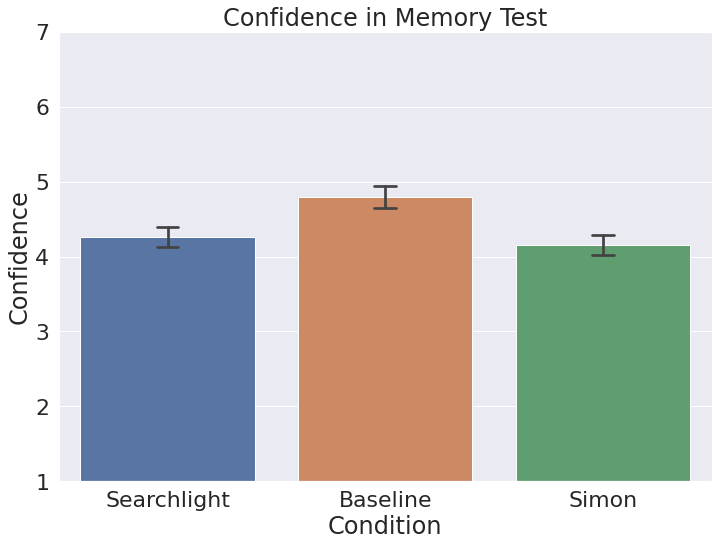

In [514]:
if not os.path.exists(f"./plots/{FOLDER_NAME}/test_data/"):
    os.makedirs(f"./plots/{FOLDER_NAME}/test_data/")

confidence = test_data[test_data['confidence']>0]

confidence = confidence[~confidence["test_order"].isin(ATTENTION_CHECK_IDS)]
# graph the mean engagement per trial order 
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'confidence', ci=95, capsize=0.1).set(title="Confidence in Memory Test", xlabel="Condition", ylabel="Confidence")
#sns.pointplot(data=confidence , x='test_order', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Reported confidence in selection", xlabel="Trial", ylabel="Reported Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence.png")

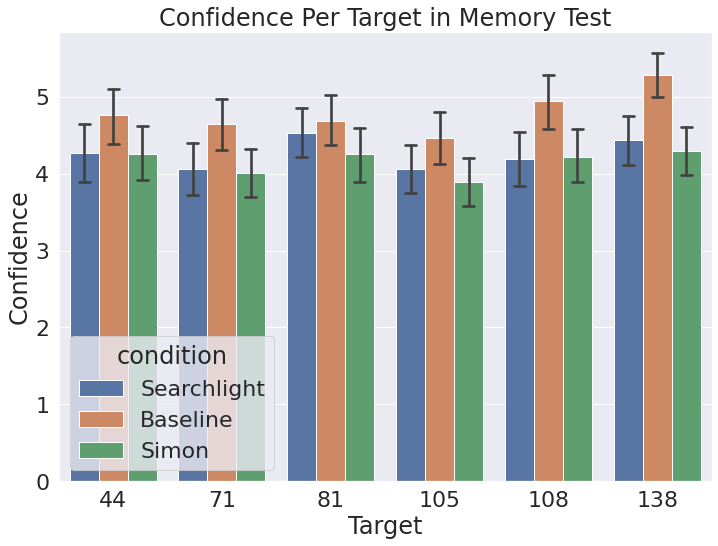

In [515]:
# confidence per target in memory test 
plt.figure()
# sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, errorbar=('ci', 95)).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
sns.barplot(data=test_data, x='targetID', hue='condition', y=f'confidence', dodge=True, ci=95, capsize=0.1).set(title="Confidence Per Target in Memory Test", xlabel="Target", ylabel="Confidence")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_target.png")

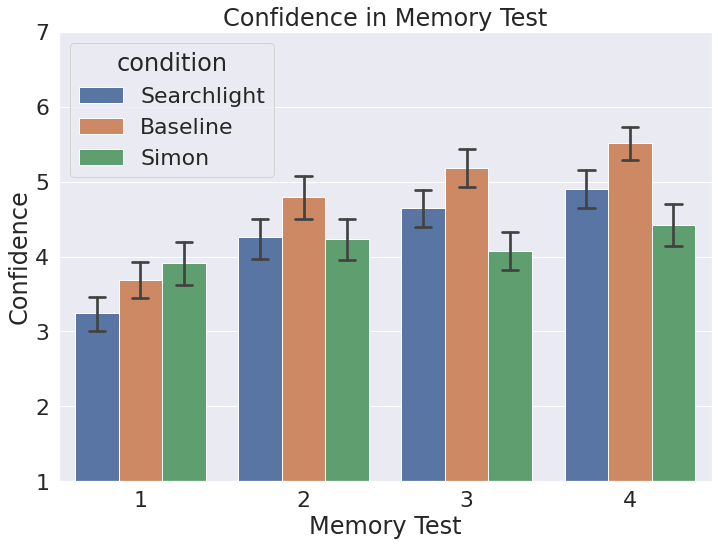

In [516]:
plt.figure()
sns.barplot(data=test_data, x='breakpoint', y=f'confidence', hue="condition", ci=95, capsize=0.1).set(title="Confidence in Memory Test", xlabel="Memory Test", ylabel="Confidence")
plt.ylim(1, 7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/confidence_per_breakpoint.png")

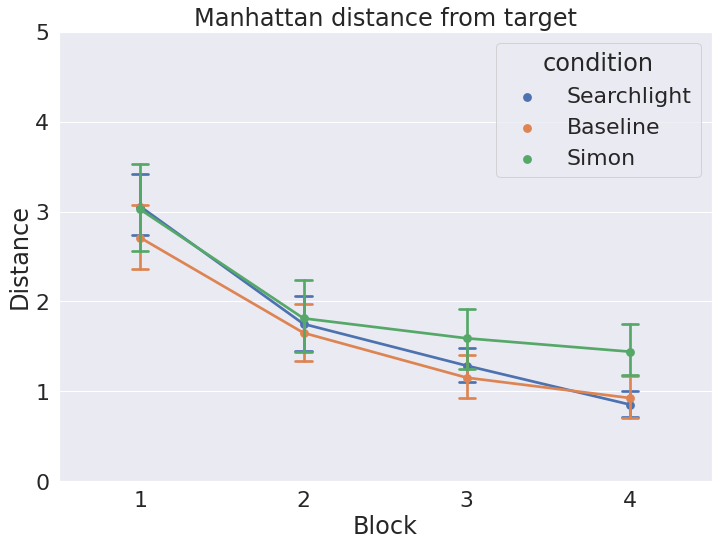

In [517]:
plt.figure()
# sns.barplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95).set(title="Manhattan distance from target", xlabel="Memory Test", ylabel="Distance")
sns.pointplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95, capsize=0.1).set(title="Manhattan distance from target", xlabel="Block", ylabel="Distance")
plt.ylim(0, 5)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_breakpoint.png")

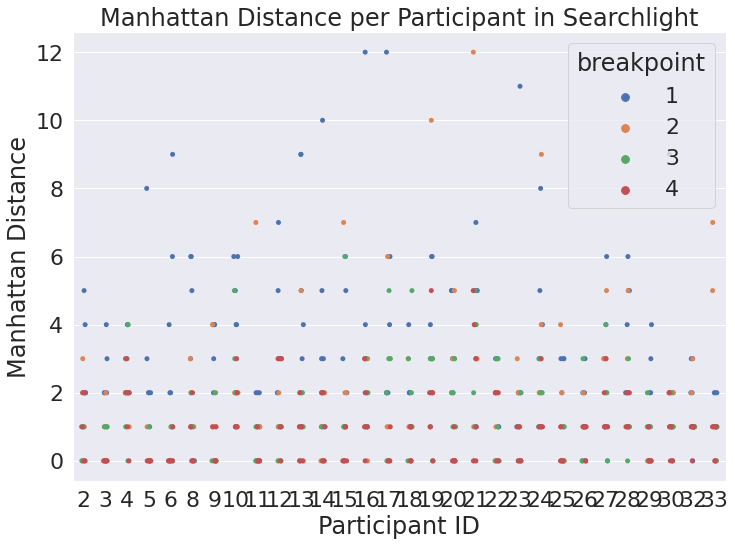

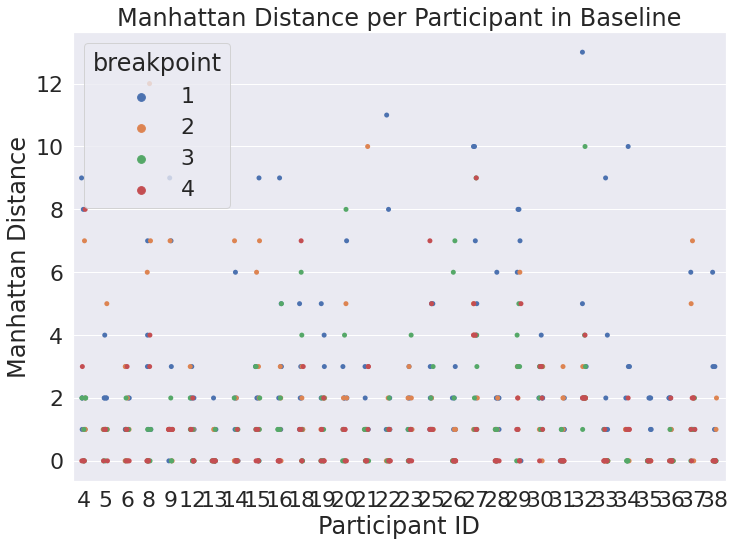

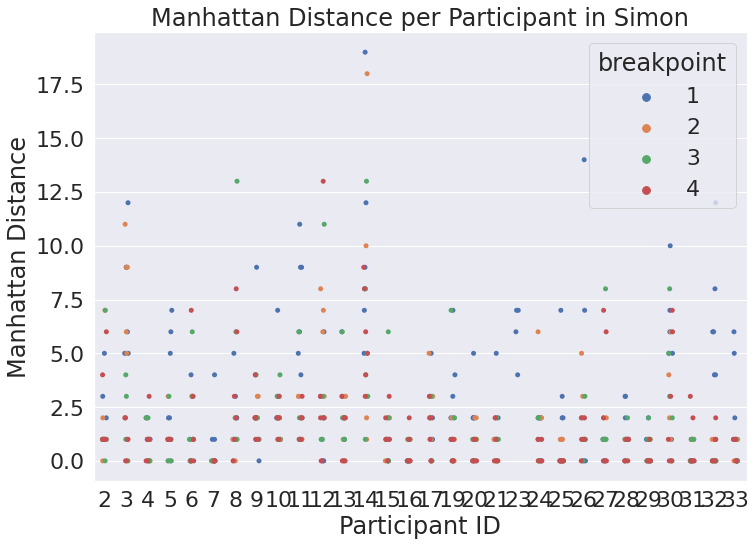

In [518]:
test_data['participantID'] = test_data['participantID'].astype('str')

for condition in conditions:
    condition_data = test_data[test_data['condition']==condition]
    plt.figure()
    sns.stripplot(data=condition_data, x="participantID", y="manhattan", hue='breakpoint', jitter=True).set(title=f"Manhattan Distance per Participant in {condition}", xlabel="Participant ID", ylabel="Manhattan Distance")
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/participant_manhattan_pointplot_{condition}.png")

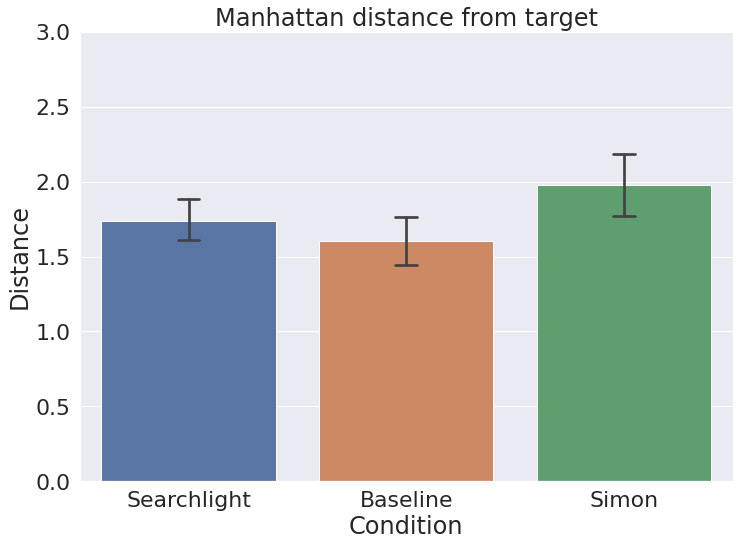

In [519]:
test_data = test_data[~test_data["test_order"].isin(ATTENTION_CHECK_IDS)]

test_data.to_csv("./data/for-analysis/test_data.csv")

plt.figure()
sns.barplot(data=test_data, x='condition', y=f'manhattan', ci=95, capsize=0.1).set(title="Manhattan distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 3)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_test_performance.png")

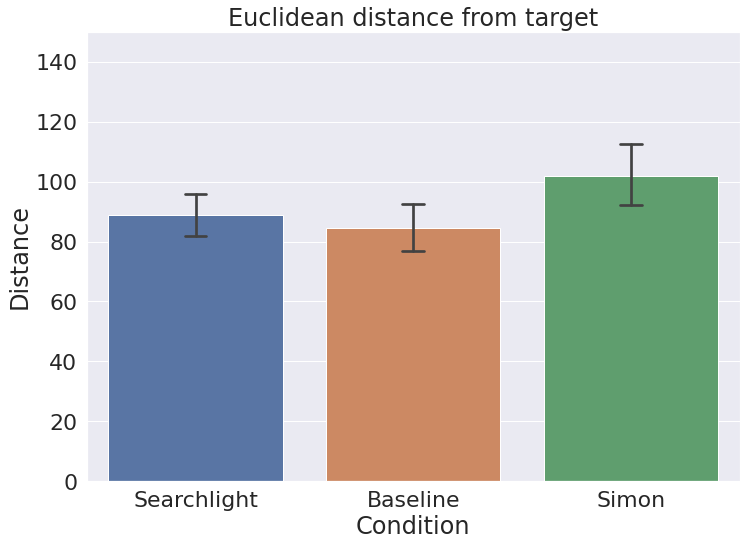

In [520]:
plt.figure()
sns.barplot(data=test_data, x='condition', y=f'euclidean', ci=95, capsize=0.1).set(title="Euclidean distance from target", xlabel="Condition", ylabel="Distance")

plt.ylim(0, 150)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_test_performance.png")

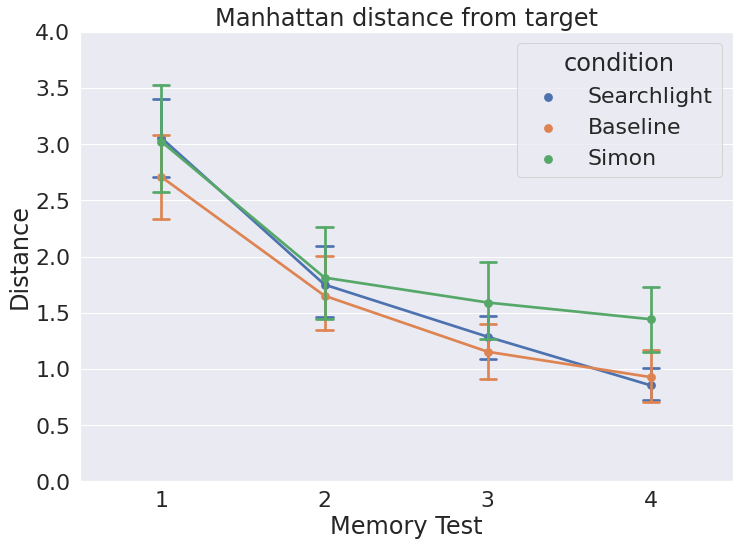

In [521]:
plt.figure()
# sns.barplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95).set(title="Euclidean distance from target", xlabel="Memory Test", ylabel="Distance")
sns.pointplot(data=test_data, x='breakpoint', y=f'manhattan', hue="condition", ci=95, capsize=0.1).set(title="Manhattan distance from target", xlabel="Memory Test", ylabel="Distance")
plt.ylim(0, 4)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/manhattan_per_breakpoint.png")

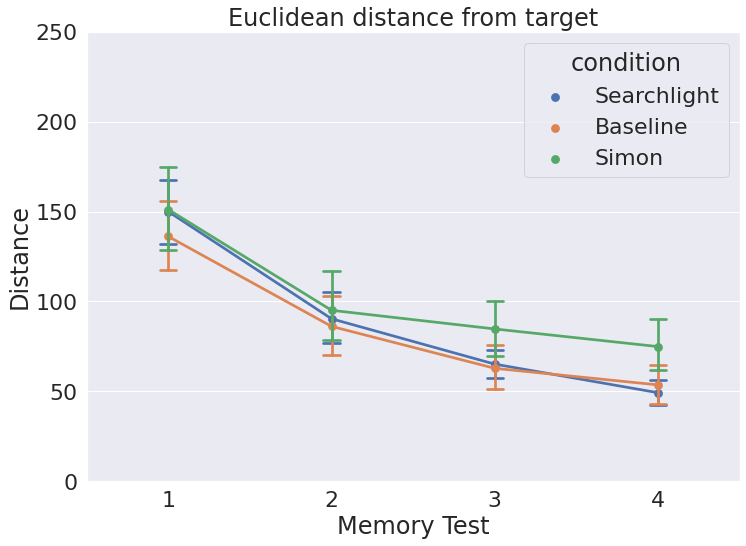

In [522]:
plt.figure()
# sns.barplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95).set(title="Euclidean distance from target", xlabel="Memory Test", ylabel="Distance")
sns.pointplot(data=test_data, x='breakpoint', y=f'euclidean', hue="condition", ci=95, capsize=0.1).set(title="Euclidean distance from target", xlabel="Memory Test", ylabel="Distance")
plt.ylim(0, 250)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/euclidean_per_breakpoint.png")

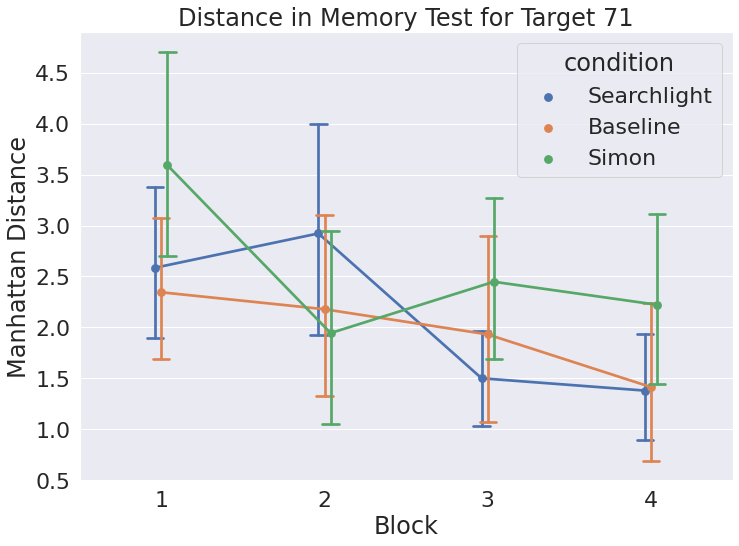

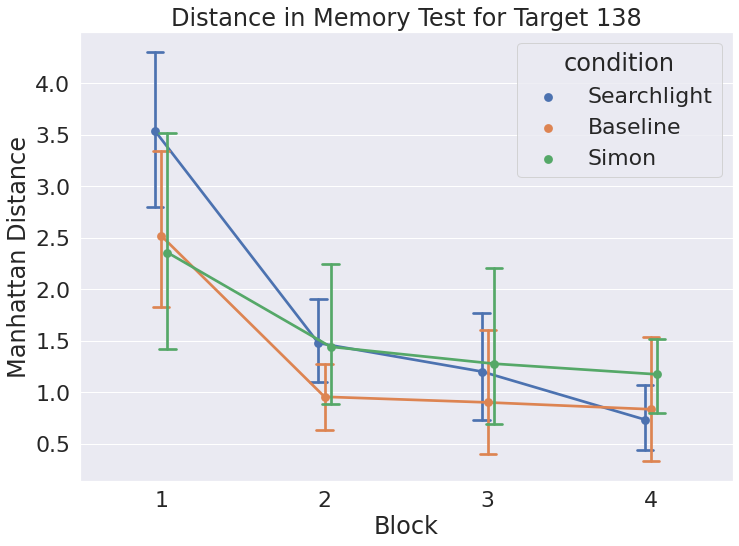

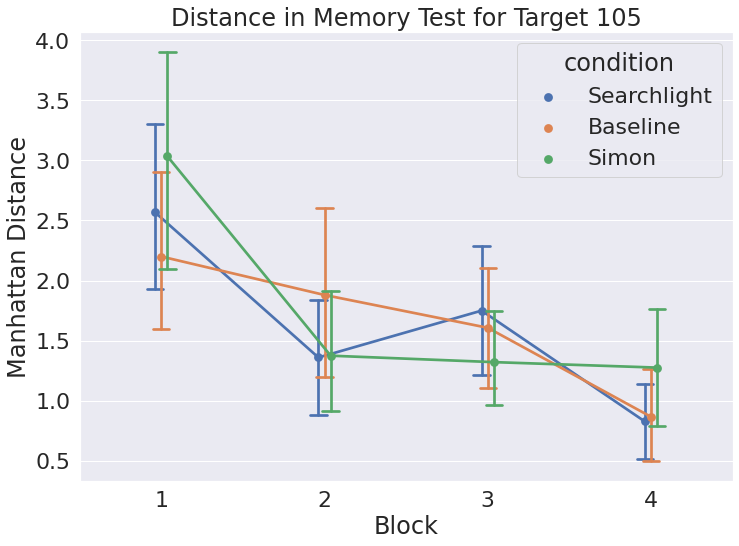

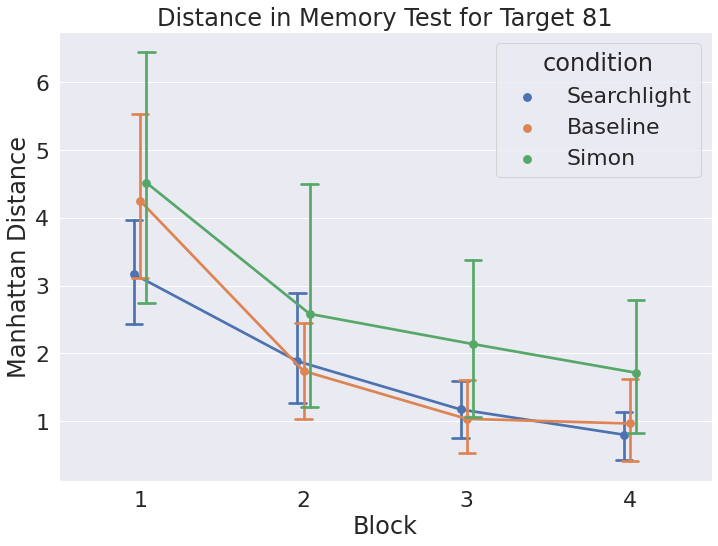

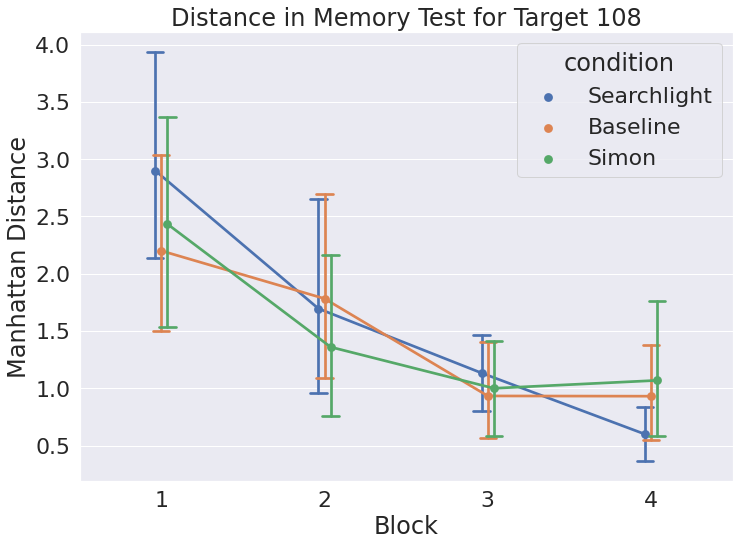

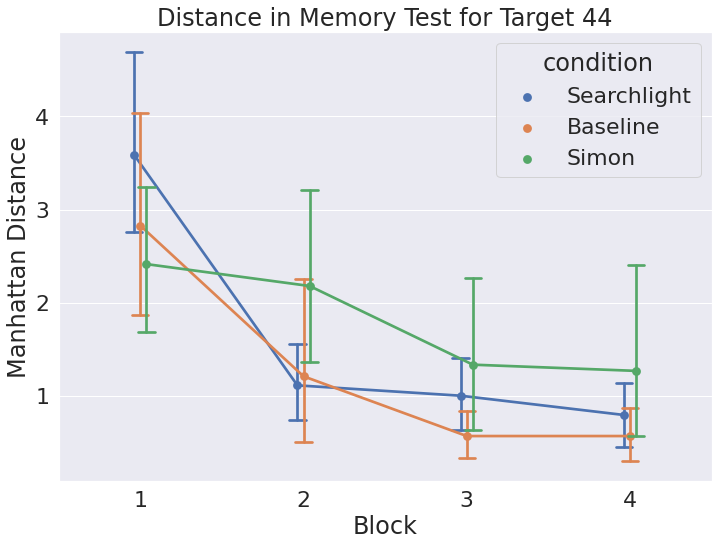

In [523]:
targets = test_data['targetID'].unique()

for target in targets:
    target_data = test_data[test_data['targetID']==target]
    plt.figure()
    sns.pointplot(data=target_data, x='breakpoint', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95), capsize=0.1).set(title=f"Distance in Memory Test for Target {target}", xlabel="Block", ylabel="Manhattan Distance")
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target_by_breakpoint_{target}.png")

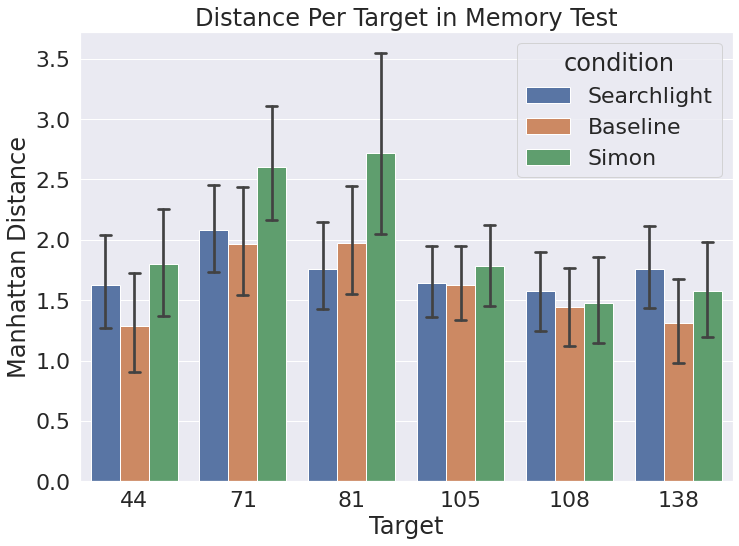

In [524]:
plt.figure()
#sns.pointplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, errorbar=('ci', 95)).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
sns.barplot(data=test_data, x='targetID', hue='condition', y=f'manhattan', dodge=True, ci=95, capsize=0.1).set(title="Distance Per Target in Memory Test", xlabel="Target", ylabel="Manhattan Distance")
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/distance_per_target.png")

<h2>Sequence Test Analysis</h2>

In [525]:
simon_sequence_test_data = SIMON_TRIAL_DATA[SIMON_TRIAL_DATA['phase']=="sequence_testing"]
simon_sequence_test_data_ordered = simon_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
simon_sequence_test_data_ordered['sequence_test_order_by_participant'] = simon_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
simon_sequence_test_data_ordered['sequence_test_order'] = simon_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
simon_sequence_test_data_ordered['condition'] = 'Simon'

no_game_sequence_test_data = NO_GAME_TRIAL_DATA[NO_GAME_TRIAL_DATA['phase']=="sequence_testing"]
no_game_sequence_test_data_ordered = no_game_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
no_game_sequence_test_data_ordered['sequence_test_order_by_participant'] = no_game_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
no_game_sequence_test_data_ordered['sequence_test_order'] = no_game_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
no_game_sequence_test_data_ordered['condition'] = 'Baseline'

searchlight_sequence_test_data = SEARCHLIGHT_TRIAL_DATA[SEARCHLIGHT_TRIAL_DATA['phase']=="sequence_testing"]
searchlight_sequence_test_data_ordered = searchlight_sequence_test_data.sort_values(['participantID', 'timeSubmitted'])
searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'] = searchlight_sequence_test_data_ordered.groupby('participantID').cumcount() + 1
searchlight_sequence_test_data_ordered['sequence_test_order'] = searchlight_sequence_test_data_ordered['sequence_test_order_by_participant'].apply(lambda x: (x - 1) // 2 + 1) 
searchlight_sequence_test_data_ordered['condition'] = 'Searchlight' 

In [526]:
simon_sequence_test_data.head()

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,errorObjects,cumulativeManhattanDistance,cumulativeEuclideanDistance,sequence,manhattanDistanceLog,euclideanDistanceLog,ctForTargetInOrder,targetErrorArray,errorInTrial,treatment
72,73,5,2026-02-03 21:02:21.401261,5,NO_GUIDE,62733b8ee687326d23d970ea,1,sequence_testing,1,1,...,,6,335.988464,"81,138,71,105,108,44","1,0,1,1,1,2","65.76473218982952,17.720045146669353,62.801273...",,,0,simon
91,92,4,2026-02-03 21:02:57.742161,4,NO_GUIDE,5b0d9326bd9c3100015660b8,1,sequence_testing,1,1,...,,2,158.246287,"81,138,71,105,108,44","0,1,0,0,0,1","14.212670403551897,50,9.219544457292889,6.7082...",,,0,simon
100,101,10,2026-02-03 21:03:15.504278,10,NO_GUIDE,6782b152b9f7ae9d753eebea,1,sequence_testing,1,1,...,,7,390.572331,"81,138,71,105,108,44","1,1,2,1,1,1","71.70076708097342,67.02984409947557,73.5527021...",,,0,simon
145,146,9,2026-02-03 21:04:25.862787,9,NO_GUIDE,63f3e75e0787bb42195e1e4c,1,sequence_testing,1,1,...,,12,526.058560,"81,138,71,105,108,44","3,3,2,2,1,1","124.06449935416659,117.61802582937703,83.54639...",,,0,simon
147,148,6,2026-02-03 21:04:28.516453,6,NO_GUIDE,60db3cf3270edd7c9c7e0bd3,1,sequence_testing,1,1,...,,8,388.315283,"81,138,71,105,108,44","3,0,2,1,1,1","124.59534501738017,3.1622776601683795,105.7591...",,,0,simon


In [527]:
no_game_sequence_test_data_ordered.columns

Index(['trialLogID', 'participantID', 'timeSubmitted', 'pid', 'condition',
       'prolificID', 'day', 'phase', 'block', 'trial', 'targetID', 'distEdge',
       'distLand', 'nearLandmark', 'isLandmark', 'targetX', 'targetY',
       'clickX', 'clickY', 'euclidean', 'manhattan', 'ct', 'underGuide',
       'errors', 'movement', 'confidence', 'errorObjects', 'sequence',
       'cumulativeManhattanDistance', 'cumulativeEuclideanDistance',
       'manhattanDistanceLog', 'euclideanDistanceLog', 'treatment',
       'sequence_test_order_by_participant', 'sequence_test_order'],
      dtype='object')

In [528]:
sequence_data_remapped = []

def save_to_sequence_data_remapped(row):
    sequence_list = row['sequence'].split(',')
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    for i in range(0, len(sequence_list)):
        sequence_data_remapped.append({
            'condition': row['condition'],
            'sequence': row['sequence'], # FIXME: these should all be in the same order between pilots, and we could check   
            'targetID': str(sequence_list[i]),
            'participantID': int(row['participantID']),
            'timeSubmitted': row['timeSubmitted'],
            'locationInSequence': (i + 1),
            'manhattanDistance': int(manhattan_distance_list[i]),
            'euclideanDistance': float(euclidean_distance_list[i]),
            'breakpoint': row['gameDistributionIndex']+1 if row['condition'] == 'Simon' else row['block'] 
        })
    return row

In [529]:
sequence_test_data = pd.concat([searchlight_sequence_test_data_ordered, no_game_sequence_test_data_ordered, simon_sequence_test_data_ordered], ignore_index=True)

sequence_test_data['breakpoint'] = sequence_test_data.apply(lambda x: x['block'] if x['condition'] != 'Simon' else x['gameDistributionIndex']+1, axis=1)

for condition in conditions:
    for breakpoint in breakpoints:
        # Filter data for current condition and breakpoint
        mask = (sequence_test_data['condition'] == condition) & (sequence_test_data['breakpoint'] == breakpoint)
        subset = sequence_test_data[mask]
        
        # Calculate mean and standard deviation for ct
        ct_mean = subset['ct'].mean()
        ct_std = subset['ct'].std()
        
        # Remove rows where ct is 3 or more standard deviations outside the mean
        outlier_mask = np.abs(subset['ct'] - ct_mean) >= 3 * ct_std
        sequence_test_data = sequence_test_data.drop(subset[outlier_mask].index)

In [530]:

sequence_test_data.apply(lambda row: save_to_sequence_data_remapped(row), axis=1)

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,euclideanDistanceLog,treatment,sequence_test_order_by_participant,sequence_test_order,gameDistributionIndex,cursorWidth,ctForTargetInOrder,targetErrorArray,errorInTrial,breakpoint
0,583,2,2026-02-03 16:52:33.344463,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,1,1,...,"97.90812019439448,177.45985461506498,121.84005...",searchlight,1,1,NaN,NaN,NaN,NaN,NaN,1
1,993,2,2026-02-03 16:55:29.523561,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,2,1,...,"555.0387373868602,65.19202405202648,247.975805...",searchlight,2,1,NaN,NaN,NaN,NaN,NaN,2
2,1393,2,2026-02-03 16:58:01.589978,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,3,1,...,"390.4266896614523,53.851648071345046,39.204591...",searchlight,3,2,NaN,NaN,NaN,NaN,NaN,3
3,1787,2,2026-02-03 17:00:19.231058,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,4,1,...,"5.099019513592785,14.866068747318504,15.297058...",searchlight,4,2,NaN,NaN,NaN,NaN,NaN,4
4,273,3,2026-02-03 16:49:58.899974,3,Searchlight,6969682819258eddb397598e,1,sequence_testing,1,1,...,"136,118.53269591129698,140.00357138301865,108....",searchlight,1,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1537,32,2026-02-03 21:36:52.607381,32,Simon,5bcbde9d08a62c0001f86bd0,1,sequence_testing,1,1,...,"48,13.152946437965904,16.55294535724685,18.357...",simon,4,2,3.0,75.0,,,0.0,4
352,1453,33,2026-02-03 21:29:25.548461,33,Simon,65465c5bc5a014ec683d55cf,1,sequence_testing,1,1,...,"312.41798923877604,58.420886675914126,377.0013...",simon,1,1,0.0,75.0,,,0.0,1
353,1495,33,2026-02-03 21:32:55.831350,33,Simon,65465c5bc5a014ec683d55cf,1,sequence_testing,1,1,...,"12.08304597359457,114.28035701729323,66.272166...",simon,2,1,1.0,75.0,,,0.0,2
354,1532,33,2026-02-03 21:36:26.162540,33,Simon,65465c5bc5a014ec683d55cf,1,sequence_testing,1,1,...,"9.486832980505138,82.03657720797474,12.0415945...",simon,3,2,2.0,75.0,,,0.0,3


In [531]:


def getMeanManhattanDistanceFromString(s: str)-> int:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=int(substring)
    return total/len(split_s)


def getMeanEuclideanDistanceFromString(s: str)-> float:
    split_s = s.split(',')
    total =0
    for substring in split_s:
        total+=float(substring)
    return total/len(split_s)

sequence_test_data['mean_manhattan_distance_per_target'] = sequence_test_data['manhattanDistanceLog'].apply(lambda x: getMeanManhattanDistanceFromString(x))
sequence_test_data['mean_euclidean_distance_per_target'] = sequence_test_data['euclideanDistanceLog'].apply(lambda x: getMeanEuclideanDistanceFromString(x))


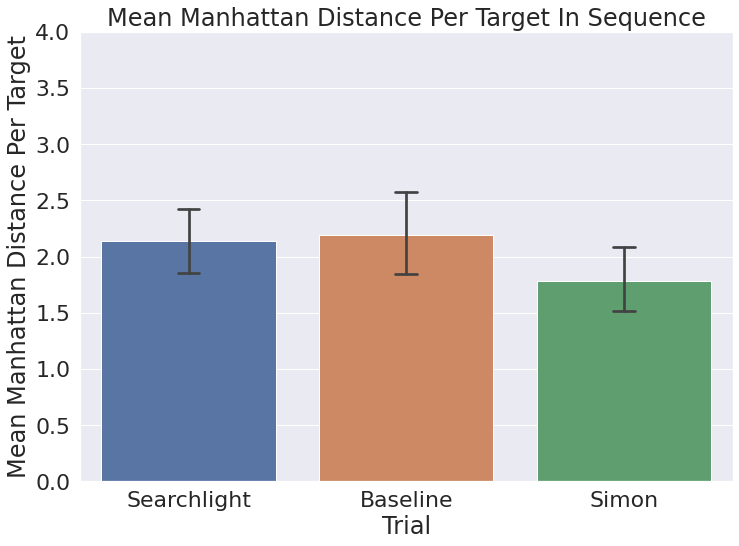

In [532]:
plt.figure()
sns.barplot(data=sequence_test_data, x='condition', y=f'mean_manhattan_distance_per_target', ci=95, capsize=0.1).set(title="Mean Manhattan Distance Per Target In Sequence", xlabel="Trial", ylabel="Mean Manhattan Distance Per Target")
plt.ylim(0,4)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_mean_manhattan_distance_per_targets.png")

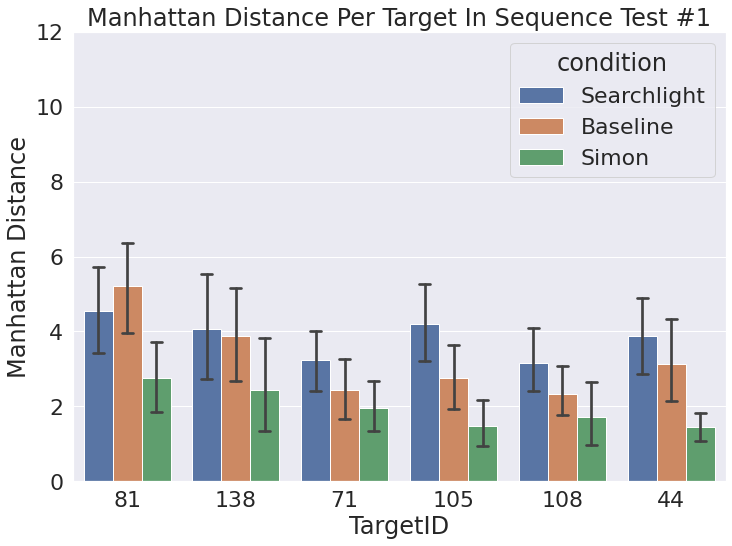

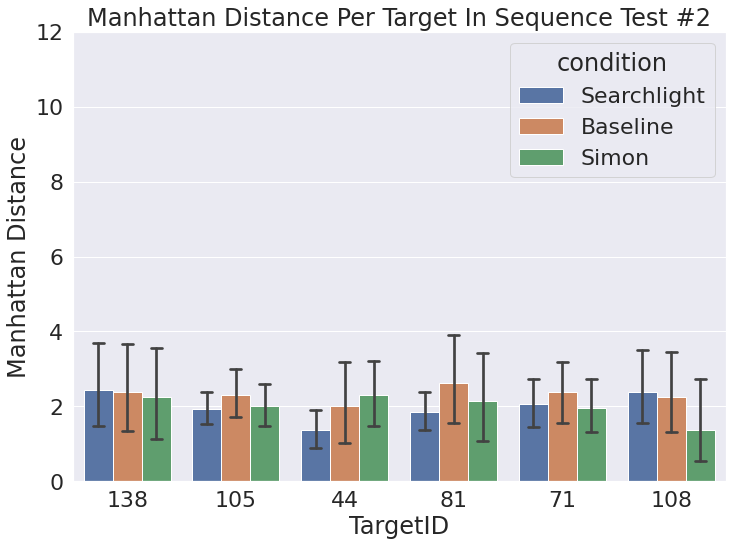

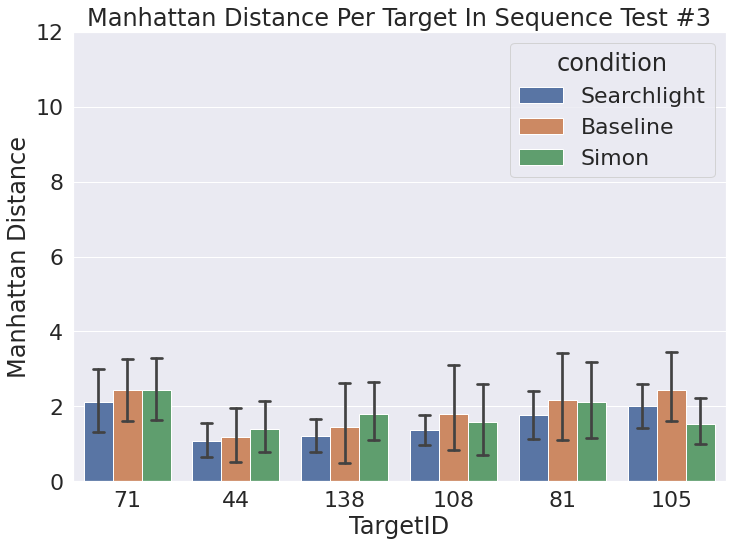

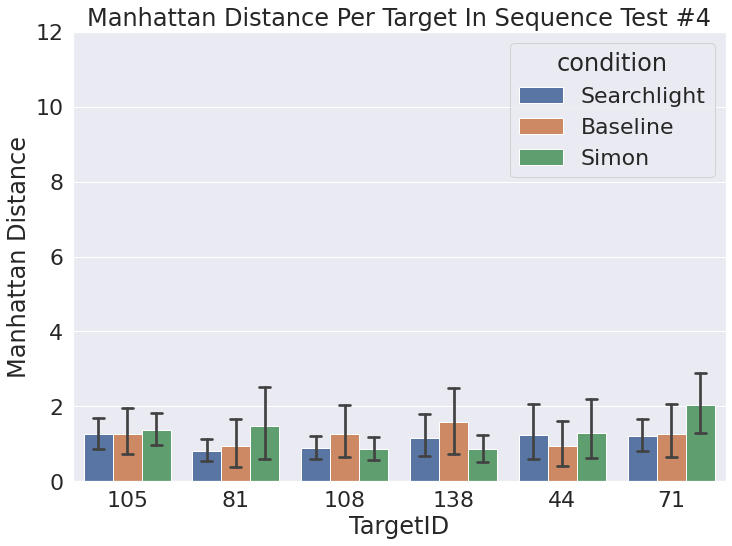

In [533]:
test_sequences = sequence_test_data['sequence'].unique()

sequence_data_remapped = pd.DataFrame(sequence_data_remapped)   

sequence_number = 1

for sequence in test_sequences:

    sequence_data = sequence_data_remapped[sequence_data_remapped['sequence'] == sequence]
    plt.figure()
    sns.barplot(data=sequence_data, x='targetID', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1).set(title=f"Manhattan Distance Per Target In Sequence Test #{int(sequence_number)}", xlabel="TargetID", ylabel="Manhattan Distance")
    plt.ylim(0,12)
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_per_targets_sequence_{int(sequence_number)}.png")
    sequence_number+=1

In [534]:
sequence_test_data['confidence'].unique()

array([2, 5, 4, 6, 3, 1, 7])

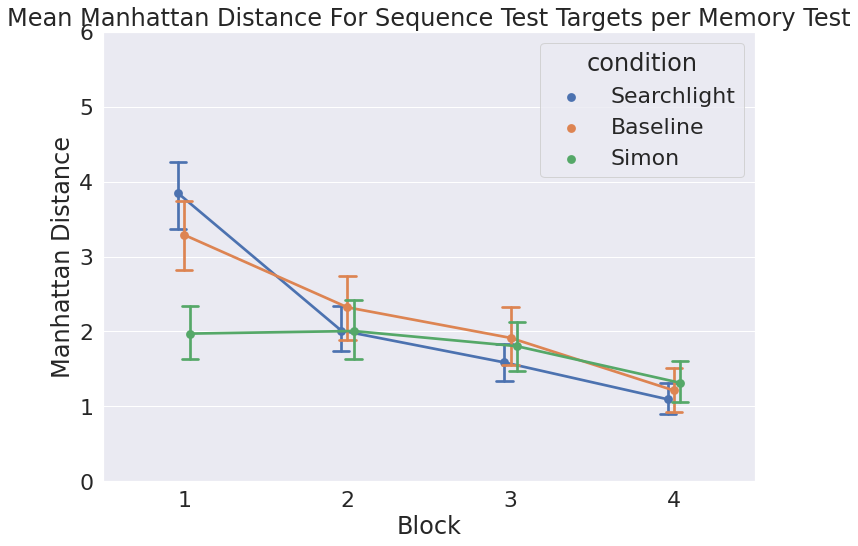

In [535]:


plt.figure()
sns.pointplot(data=sequence_data_remapped, x='breakpoint', y=f'manhattanDistance', hue='condition', ci=95, capsize=0.1, dodge=True).set(title=f"Mean Manhattan Distance For Sequence Test Targets per Memory Test", xlabel="Block", ylabel="Manhattan Distance")
plt.ylim(0,6)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_means_per_breakpoint.png")

In [536]:
sequence_data_remapped.to_csv("./data/for-analysis/sequence_data_mapped_to_individual_targets.csv")

In [537]:
sequence_data_distance_totals = []

def save_to_sequence_data_distance_totals(row):
    manhattan_distance_list = row['manhattanDistanceLog'].split(',')
    euclidean_distance_list = row['euclideanDistanceLog'].split(',')
    total_manhattan = 0
    total_euclidean = 0
    for i in range(0, len(manhattan_distance_list)):
        total_manhattan+=int(manhattan_distance_list[i])
        total_euclidean+=float(euclidean_distance_list[i])
    sequence_data_distance_totals.append({
        'sequence': row['sequence'],
        'condition': row['condition'],
        'participantID': str(row['participantID']),
        'breakpoint': row['gameDistributionIndex']+1  if row['condition'] == 'Simon' else row['block'], # does simon have these the same?
        'total_manhattan': total_manhattan,
        'total_euclidean': total_euclidean
    })
    return row

In [538]:
sequence_test_data.apply(lambda x: save_to_sequence_data_distance_totals(x), axis =1)

,trialLogID,participantID,timeSubmitted,pid,condition,prolificID,day,phase,block,trial,...,sequence_test_order_by_participant,sequence_test_order,gameDistributionIndex,cursorWidth,ctForTargetInOrder,targetErrorArray,errorInTrial,breakpoint,mean_manhattan_distance_per_target,mean_euclidean_distance_per_target
0,583,2,2026-02-03 16:52:33.344463,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,1,1,...,1,1,NaN,NaN,NaN,NaN,NaN,1,3.166667,150.985391
1,993,2,2026-02-03 16:55:29.523561,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,2,1,...,2,1,NaN,NaN,NaN,NaN,NaN,2,3.833333,199.659303
2,1393,2,2026-02-03 16:58:01.589978,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,3,1,...,3,2,NaN,NaN,NaN,NaN,NaN,3,2.333333,113.244231
3,1787,2,2026-02-03 17:00:19.231058,2,Searchlight,611ffe84a8214760847fc4de,1,sequence_testing,4,1,...,4,2,NaN,NaN,NaN,NaN,NaN,4,0.500000,30.839070
4,273,3,2026-02-03 16:49:58.899974,3,Searchlight,6969682819258eddb397598e,1,sequence_testing,1,1,...,1,1,NaN,NaN,NaN,NaN,NaN,1,2.166667,101.443330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1537,32,2026-02-03 21:36:52.607381,32,Simon,5bcbde9d08a62c0001f86bd0,1,sequence_testing,1,1,...,4,2,3.0,75.0,,,0.0,4,2.500000,121.845095
352,1453,33,2026-02-03 21:29:25.548461,33,Simon,65465c5bc5a014ec683d55cf,1,sequence_testing,1,1,...,1,1,0.0,75.0,,,0.0,1,3.166667,172.301534
353,1495,33,2026-02-03 21:32:55.831350,33,Simon,65465c5bc5a014ec683d55cf,1,sequence_testing,1,1,...,2,1,1.0,75.0,,,0.0,2,1.000000,55.657689
354,1532,33,2026-02-03 21:36:26.162540,33,Simon,65465c5bc5a014ec683d55cf,1,sequence_testing,1,1,...,3,2,2.0,75.0,,,0.0,3,0.666667,37.883646


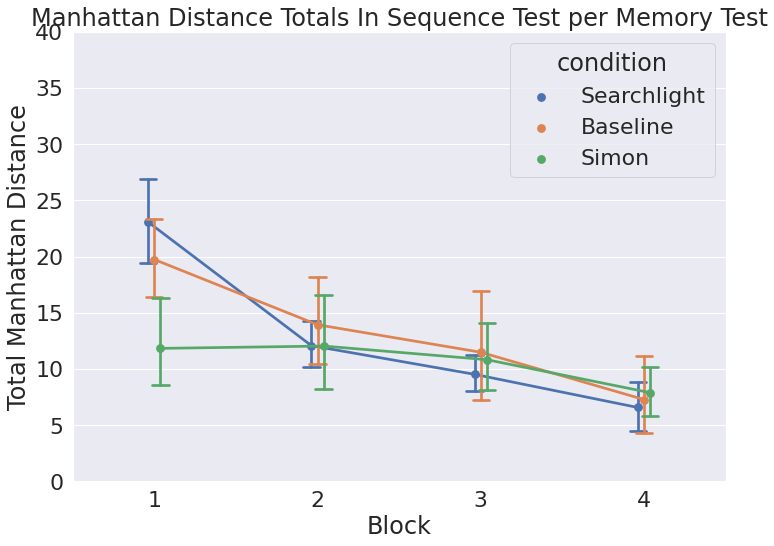

In [539]:
sequence_data_distances = pd.DataFrame(sequence_data_distance_totals)   

plt.figure()
sns.pointplot(data=sequence_data_distances, x='breakpoint', y=f'total_manhattan', hue='condition', ci=95, capsize=0.1, dodge=True).set(title=f"Manhattan Distance Totals In Sequence Test per Memory Test", xlabel="Block", ylabel="Total Manhattan Distance")
plt.ylim(0,40)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_manhattan_distance_totals_per_breakpoint.png")

In [540]:
sequence_data_distances.to_csv("./data/for-analysis/sequence_data_distance_totals.csv")

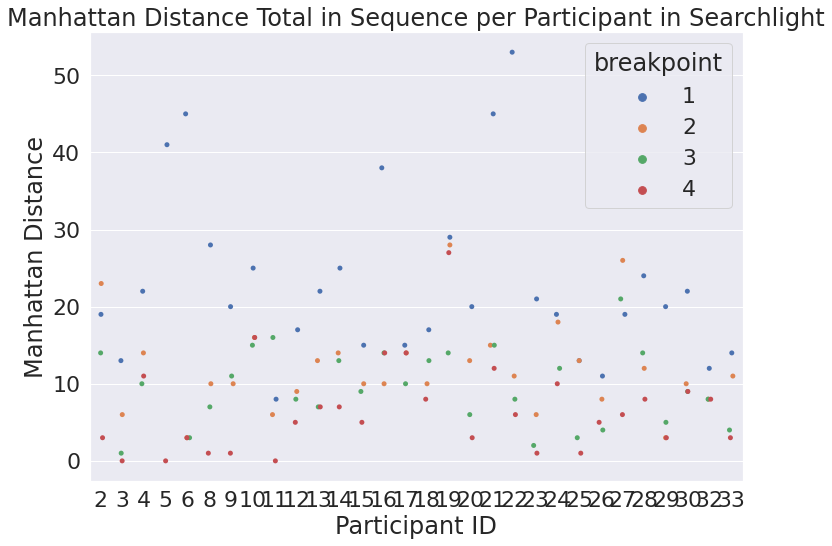

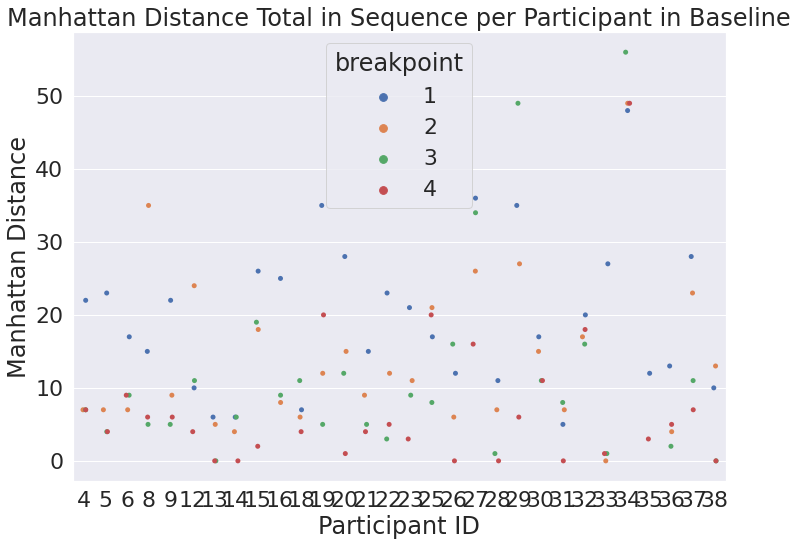

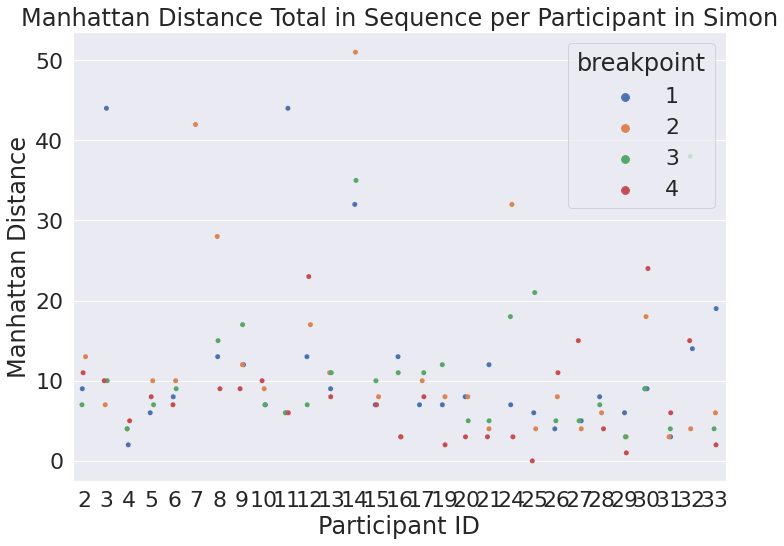

In [541]:
conditions = sequence_data_distances['condition'].unique()

for condition in conditions:
    condition_data =sequence_data_distances[sequence_data_distances['condition']==condition]
    plt.figure()
    sns.stripplot(data=condition_data, x="participantID", y="total_manhattan", hue='breakpoint', jitter=True).set(title=f"Manhattan Distance Total in Sequence per Participant in {condition}", xlabel="Participant ID", ylabel="Manhattan Distance")
    plt.savefig(f"./plots/{FOLDER_NAME}/test_data/participant_sequence_test_manhattan_pointplot_{condition}.png")

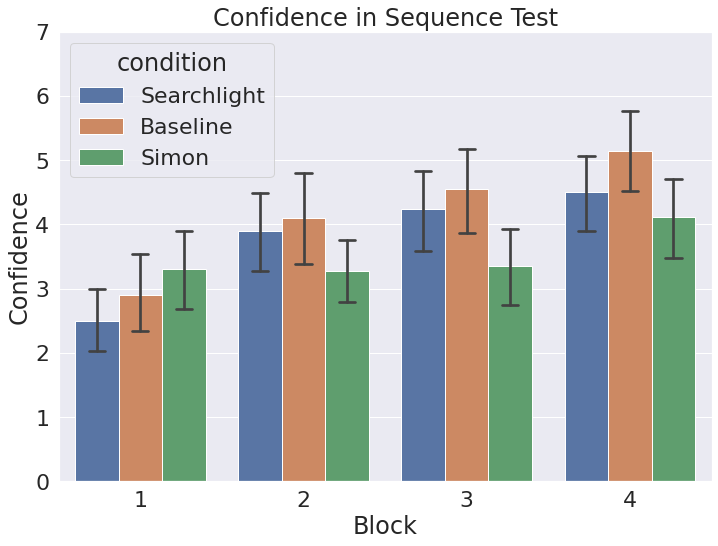

In [542]:
def _assignBreakpoint(row):
    return row['gameDistributionIndex']+1 if row['condition']=='Simon' else row['block']

sequence_test_data['breakpoint'] = sequence_test_data.apply(lambda x: _assignBreakpoint(x), axis=1)
sequence_test_data.to_csv("./data/for-analysis/sequence_test_data.csv")

plt.figure()
sns.barplot(data=sequence_test_data, x='breakpoint', y=f'confidence', hue='condition', ci=95, capsize=0.1).set(title="Confidence in Sequence Test", xlabel="Block", ylabel="Confidence")
plt.ylim(0,7)
plt.savefig(f"./plots/{FOLDER_NAME}/test_data/sequence_test_confidence.png")